In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_csv('covid_data_cleaned.csv')
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

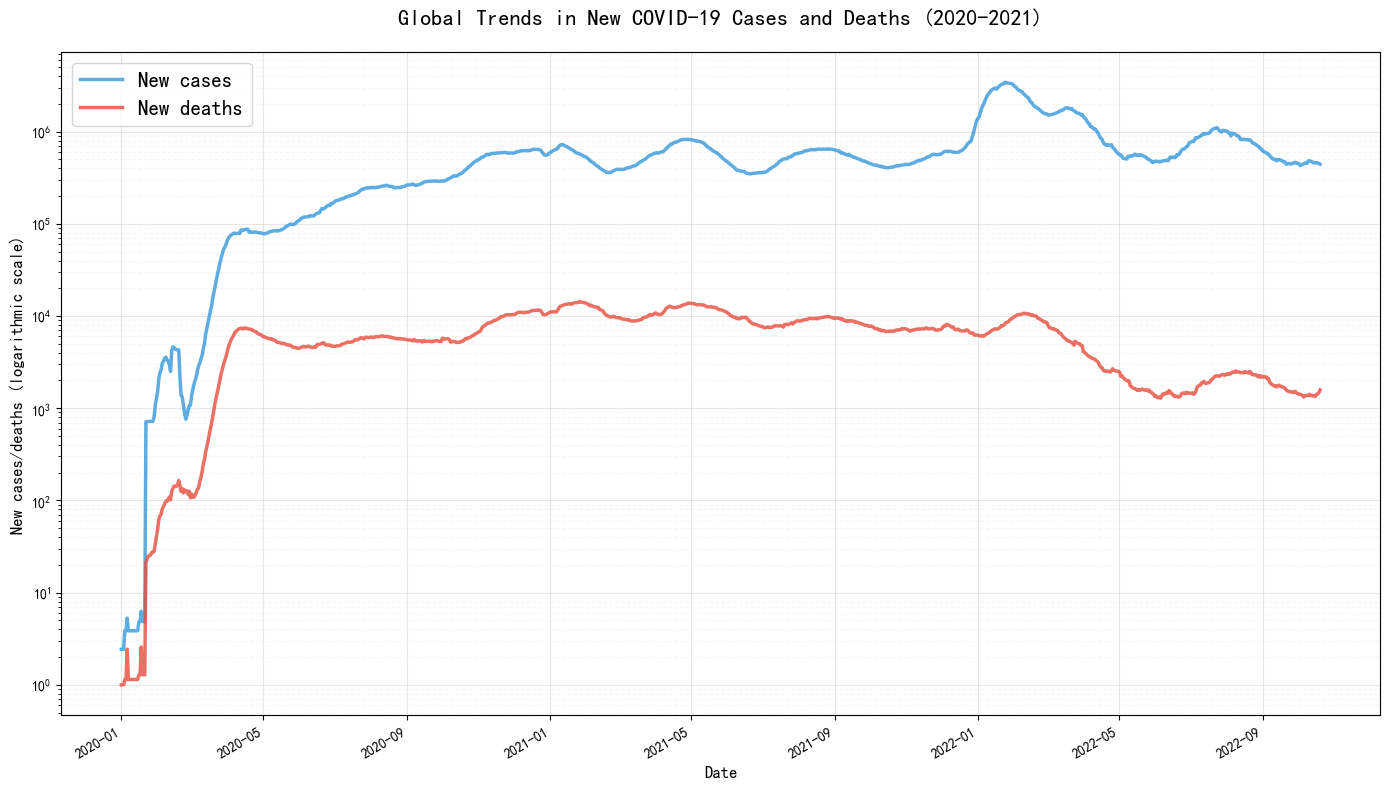

In [3]:
def calculate_global_daily(df):
    """计算全球每日数据汇总"""
    # 按日期汇总
    global_daily = df.groupby('date').agg({
        'new_cases_smoothed': 'sum',
        'new_deaths_smoothed': 'sum'
    }).reset_index()
    
    # 日期格式
    global_daily['date'] = pd.to_datetime(global_daily['date'])
    
    # 排序
    global_daily = global_daily.sort_values('date')
    
    return global_daily

# 单轴对比图
def plot_global_comparison_log(global_daily):
    """单轴对数尺度图表 - 病例与死亡在同一y轴上"""
    
    plt.figure(figsize=(14, 8))
    
    # 绘制新增病例曲线（对数）
    plt.plot(global_daily['date'], 
             global_daily['new_cases_smoothed'], 
             color='#3498db', 
             linewidth=2.5,
             alpha=0.8,
             label='New cases')
    
    # 绘制新增死亡曲线（对数）
    plt.plot(global_daily['date'], 
             global_daily['new_deaths_smoothed'], 
             color='#e74c3c', 
             linewidth=2.5,
             alpha=0.8,
             label='New deaths')
    
    # 设置y轴为对数尺度
    plt.yscale('log')
    
    # 设置标题和标签
    plt.title('Global Trends in New COVID-19 Cases and Deaths (2020-2021)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('New cases/deaths (logarithmic scale)', fontsize=12)
    plt.grid(True, which='major', alpha=0.3, linestyle='-')
    plt.grid(True, which='minor', alpha=0.1, linestyle='--')
    plt.legend(loc='upper left', fontsize=15)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()


global_daily = calculate_global_daily(df)
plot_global_comparison_log(global_daily)

各大洲累计疫情统计:
North America: 97,150,292 例确诊, 1,067,190 例死亡
Asia: 44,638,636 例确诊, 528,953 例死亡
Europe: 36,537,787 例确诊, 381,402 例死亡
South America: 34,771,320 例确诊, 687,423 例死亡
Oceania: 10,341,058 例确诊, 15,530 例死亡
Africa: 1,265,332 例确诊, 29,257 例死亡

各大洲病例死亡率排名:
Africa: 2.31%
South America: 1.98%
Asia: 1.18%
North America: 1.10%
Europe: 1.04%
Oceania: 0.15%


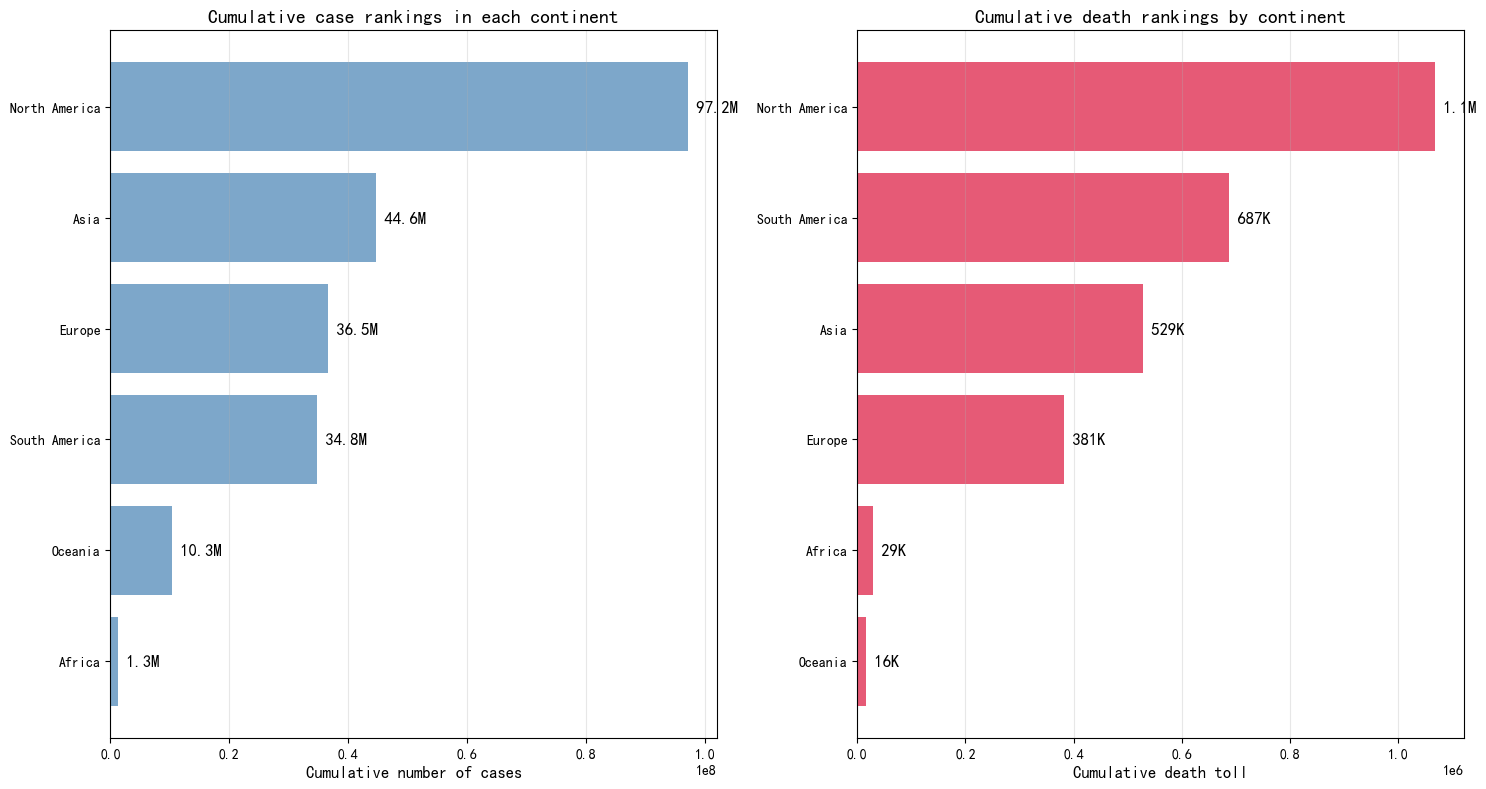

In [5]:
def calculate_continent_stats(df):
    # 移除没有洲信息的行
    df_clean = df.dropna(subset=['continent'])
    
    # 按洲分组，获取每个洲的最大累计病例和死亡数
    continent_stats = df_clean.groupby('continent').agg({
        'total_cases': 'max', 
        'total_deaths': 'max'  
    }).reset_index()
    
    # 按病例数降序排列
    continent_stats = continent_stats.sort_values('total_cases', ascending=False)
    
    print("各大洲累计疫情统计:")
    for _, row in continent_stats.iterrows():
        print(f"{row['continent']}: {row['total_cases']:,.0f} 例确诊, {row['total_deaths']:,.0f} 例死亡")

    continent_stats['case_fatality_rate'] = (continent_stats['total_deaths'] / continent_stats['total_cases']) * 100
    continent_stats = continent_stats.sort_values('case_fatality_rate', ascending=False)
    print("\n各大洲病例死亡率排名:")
    for _, row in continent_stats.iterrows():
        print(f"{row['continent']}: {row['case_fatality_rate']:.2f}%")

    return continent_stats


# 水平柱状图
def plot_horizontal_barchart(continent_stats):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
    
    # 排序数据
    cases_sorted = continent_stats.sort_values('total_cases', ascending=True)
    deaths_sorted = continent_stats.sort_values('total_deaths', ascending=True)
    
    # 累计病例水平柱状图
    y_pos = np.arange(len(cases_sorted))
    ax1.barh(y_pos, cases_sorted['total_cases'], color='steelblue', alpha=0.7)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(cases_sorted['continent'])
    ax1.set_xlabel('Cumulative number of cases', fontsize=12)
    ax1.set_title('Cumulative case rankings in each continent', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # 数值标签
    for i, v in enumerate(cases_sorted['total_cases']):
        label = f'{v/1e6:.1f}M' if v > 1e6 else f'{v/1e3:.0f}K'
        ax1.text(v, i, f' {label}', va='center', fontsize=12)
    
    # 累计死亡水平柱状图
    y_pos = np.arange(len(deaths_sorted))
    ax2.barh(y_pos, deaths_sorted['total_deaths'], color='crimson', alpha=0.7)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(deaths_sorted['continent'])
    ax2.set_xlabel('Cumulative death toll', fontsize=12)
    ax2.set_title('Cumulative death rankings by continent', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    
    # 数值标签
    for i, v in enumerate(deaths_sorted['total_deaths']):
        label = f'{v/1e6:.1f}M' if v > 1e6 else f'{v/1e3:.0f}K'
        ax2.text(v, i, f' {label}', va='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()

continent_stats = calculate_continent_stats(df)
plot_horizontal_barchart(continent_stats)

分析国家数量: 181
疫苗接种率范围: 0.2% - 93.9%
病例增长率范围: 7.9% - 233.7%
疫苗接种率每增加1%，病例增长率平均下降 0.424%


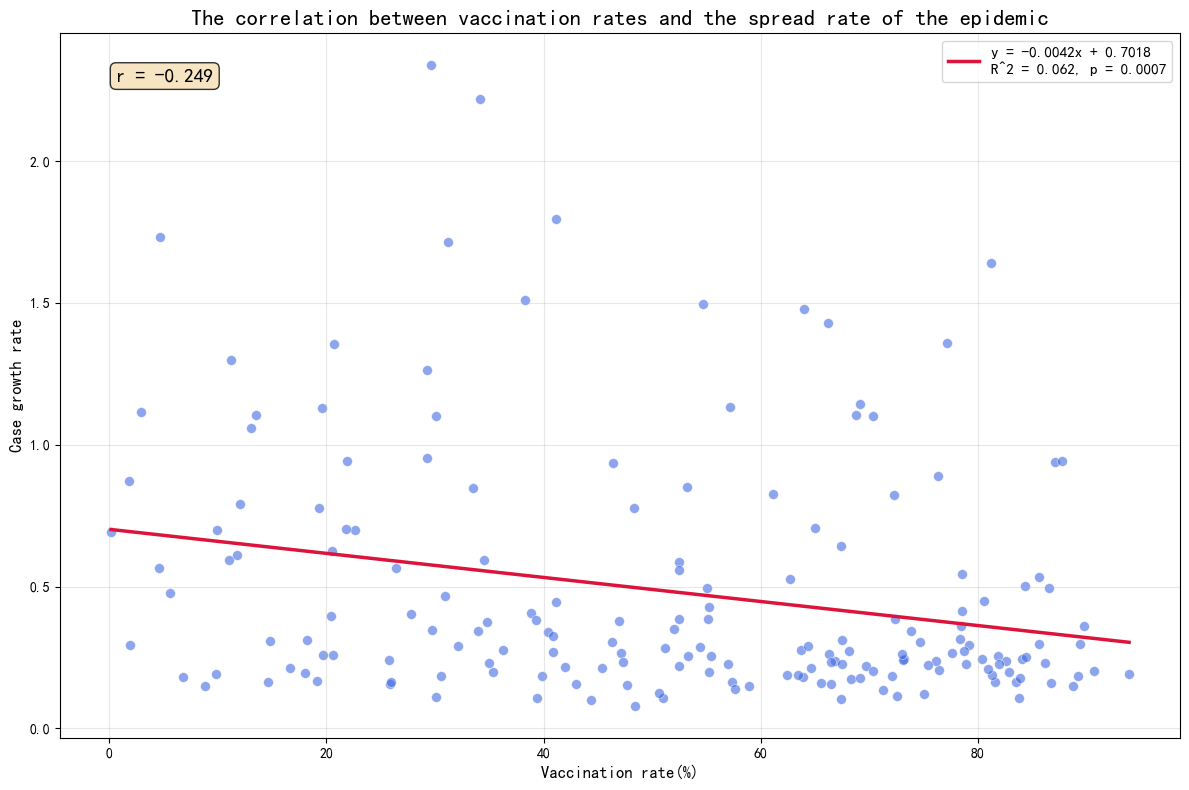

In [16]:
# 设置图表样式
plt.style.use('default')

# 1. 计算疫苗接种率与病例增长率的关系
def calculate_vaccine_effect(df):
    """计算每个国家的疫苗接种率和病例增长率关系"""
    
    # 按国家分组，获取最大疫苗接种率和平均病例增长率
    vaccine_effect = df.groupby('location').agg({
        'people_fully_vaccinated_per_hundred': 'max',
        'cases_growth_rate': 'mean'
    }).reset_index()
    
    vaccine_effect = vaccine_effect.rename(columns={
        'people_fully_vaccinated_per_hundred': 'vaccination_rate',
        'cases_growth_rate': 'avg_growth_rate'
    })
    
    # 去掉异常值
    vaccine_effect = vaccine_effect[
        (vaccine_effect['vaccination_rate'] >= 0) & 
        (vaccine_effect['vaccination_rate'] <= 100) &
        (vaccine_effect['avg_growth_rate'].between(-2.5, 2.5))  # 合理范围
    ]
    
    print(f"分析国家数量: {len(vaccine_effect)}")
    print(f"疫苗接种率范围: {vaccine_effect['vaccination_rate'].min():.1f}% - {vaccine_effect['vaccination_rate'].max():.1f}%")
    print(f"病例增长率范围: {vaccine_effect['avg_growth_rate'].min()*100:.1f}% - {vaccine_effect['avg_growth_rate'].max()*100:.1f}%")
    
    return vaccine_effect

def plot_vaccine_scatter(vaccine_effect):
    """绘制疫苗接种率vs病例增长率的散点图及回归线"""
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
    
    plt.figure(figsize=(12, 8))
    
    # 散点图
    plt.scatter(vaccine_effect['vaccination_rate'], 
                vaccine_effect['avg_growth_rate'], 
                alpha=0.6, 
                s=50,  # 点的大小
                color='royalblue',
                edgecolors='white',
                linewidth=0.5)
    
    # 回归线
    x = vaccine_effect['vaccination_rate']
    y = vaccine_effect['avg_growth_rate']
    
    # 计算回归
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept

    if slope < 0:
        print(f"疫苗接种率每增加1%，病例增长率平均下降 {abs(slope*100):.3f}%")
    else:
        print(f"疫苗接种率每增加1%，病例增长率平均增加 {abs(slope*100):.3f}%") 
    
    plt.plot(x_line, y_line, color='crimson', linewidth=2.5, 
             label=f'y = {slope:.4f}x + {intercept:.4f}\nR^2 = {r_value**2:.3f}, p = {p_value:.4f}')
    plt.title('The correlation between vaccination rates and the spread rate of the epidemic', fontsize=16, fontweight='bold')
    plt.xlabel('Vaccination rate(%)', fontsize=12)
    plt.ylabel('Case growth rate', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best', fontsize=11)
    plt.text(0.05, 0.95, f'r = {r_value:.3f}', 
             transform=plt.gca().transAxes, fontsize=14,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.tight_layout()
    plt.show()
    
    return slope, r_value

vaccine_effect = calculate_vaccine_effect(df)
slope, r_value = plot_vaccine_scatter(vaccine_effect)
        

C:\Users\30760\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.draw()
C:\Users\30760\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


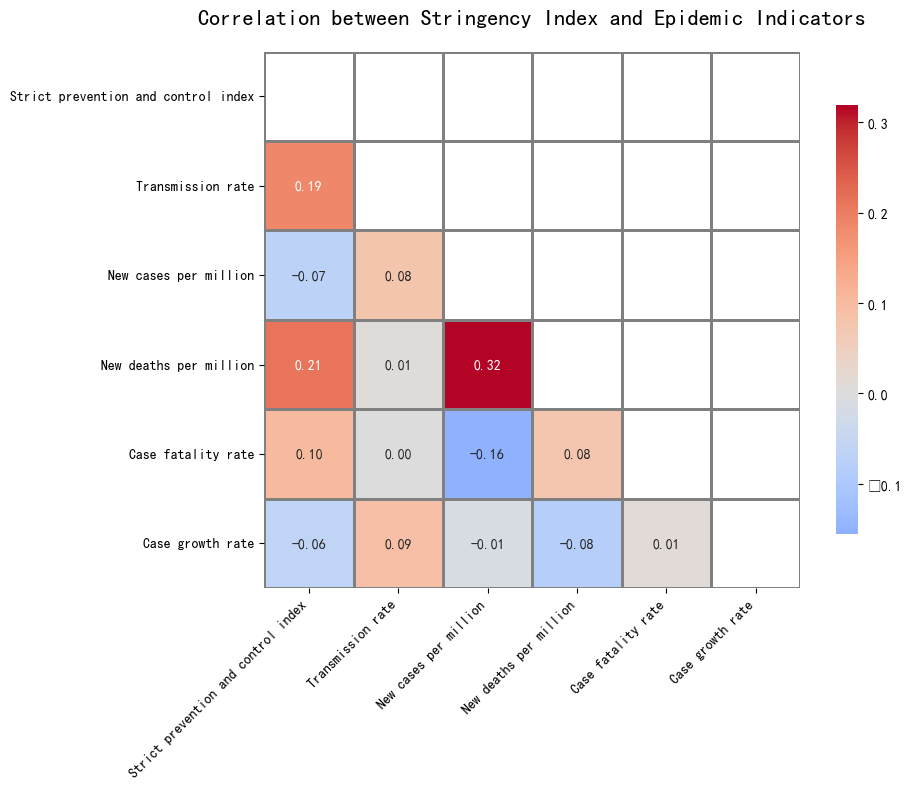

C:\Users\30760\AppData\Local\Temp\ipykernel_81744\2412803628.py:96: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()


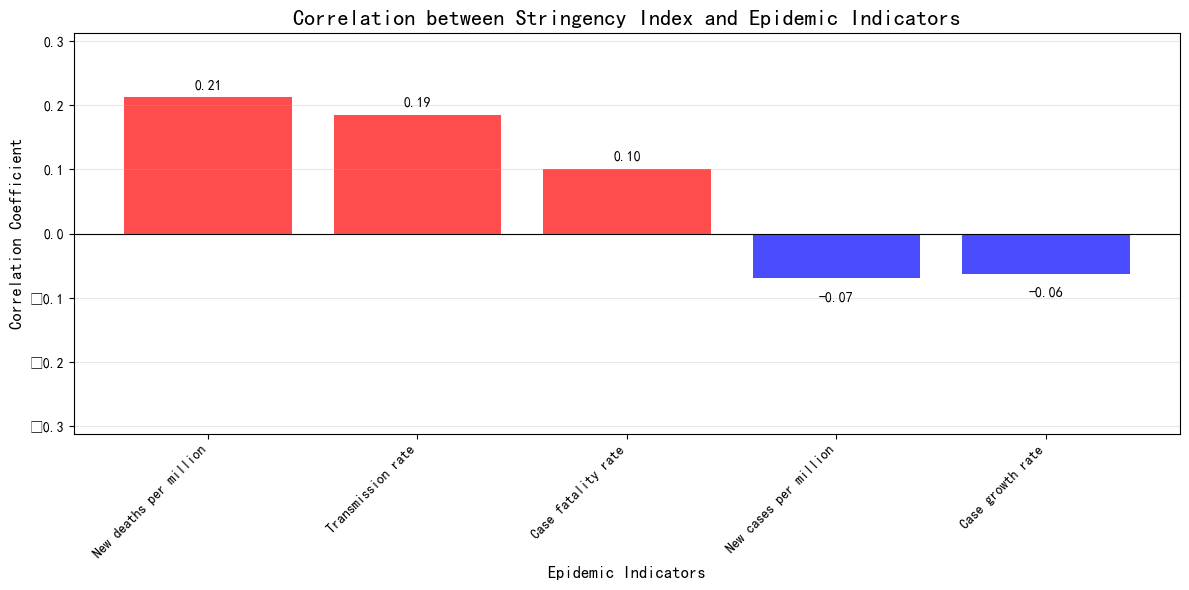

In [20]:
column_name_mapping = {
    'stringency_index': 'Strict prevention and control index',
    'reproduction_rate': 'Transmission rate',
    'new_cases_smoothed_per_million': 'New cases per million',
    'new_deaths_smoothed_per_million': 'New deaths per million',
    'case_fatality_rate': 'Case fatality rate',
    'cases_growth_rate': 'Case growth rate'
}

# 1. 计算相关系数
def calculate_stringency_correlation(df):
    stringency_metrics = [
        'stringency_index',           # Strict prevention and control index
        'reproduction_rate',          # Transmission rate
        'new_cases_smoothed_per_million',  # New cases per million
        'new_deaths_smoothed_per_million', # New deaths per million
        'case_fatality_rate',         # Case fatality rate
        'cases_growth_rate'           # Case growth rate
    ]
    
    available_metrics = [col for col in stringency_metrics if col in df.columns]
    data = df[available_metrics].copy()
    data = data.dropna()
    
    stringency_corr = data.corr()
    
    # 将列名转换为英文
    stringency_corr_en = stringency_corr.rename(
        columns=column_name_mapping,
        index=column_name_mapping
    )
    
    return stringency_corr_en

# 2. 热力图
def plot_stringency_heatmap(stringency_corr_en):
    plt.figure(figsize=(10, 8))

    mask = np.triu(np.ones_like(stringency_corr_en, dtype=bool)) 
    heatmap = sns.heatmap(
        stringency_corr_en,
        mask=mask, 
        annot=True, 
        fmt=".2f",   
        cmap="coolwarm",  
        center=0,  
        square=True, 
        linewidths=0.8, 
        linecolor="gray",
        cbar_kws={"shrink": 0.8} 
    )

    plt.title("Correlation between Stringency Index and Epidemic Indicators", fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return heatmap

# 3. 相关性条形图
def plot_stringency_correlation_bars(stringency_corr_en):
    """绘制防控严格指数与其他指标的相关性条形图"""
    
    # 提取与防控严格指数的相关性（排除与自身的相关性）
    stringency_corr_series = stringency_corr_en['Strict prevention and control index'].copy()
    stringency_corr_series = stringency_corr_series[stringency_corr_series.index != 'Strict prevention and control index']
    
    # 按绝对值排序
    stringency_corr_series = stringency_corr_series.sort_values(key=abs, ascending=False)
    
    plt.figure(figsize=(12, 6))    
    colors = ['red' if x > 0 else 'blue' for x in stringency_corr_series.values]
    
    bars = plt.bar(stringency_corr_series.index, stringency_corr_series.values, color=colors, alpha=0.7)
    
    # 数值标签
    for bar, value in zip(bars, stringency_corr_series.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, 
                height + (0.01 if height > 0 else -0.02),
                f'{value:.2f}', 
                ha='center', 
                va='bottom' if height > 0 else 'top',
                fontsize=10)
    
    plt.axhline(y=0, color='black', linewidth=0.8, linestyle='-')
    plt.title('Correlation between Stringency Index and Epidemic Indicators', fontsize=16, fontweight='bold')
    plt.xlabel('Epidemic Indicators', fontsize=12)
    plt.ylabel('Correlation Coefficient', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    max_val = max(abs(stringency_corr_series.min()), abs(stringency_corr_series.max()))
    plt.ylim(-max_val - 0.1, max_val + 0.1)
    plt.tight_layout()
    plt.show()

# 使用新变量名调用函数
stringency_corr_en = calculate_stringency_correlation(df)
plot_stringency_heatmap(stringency_corr_en)
plot_stringency_correlation_bars(stringency_corr_en)

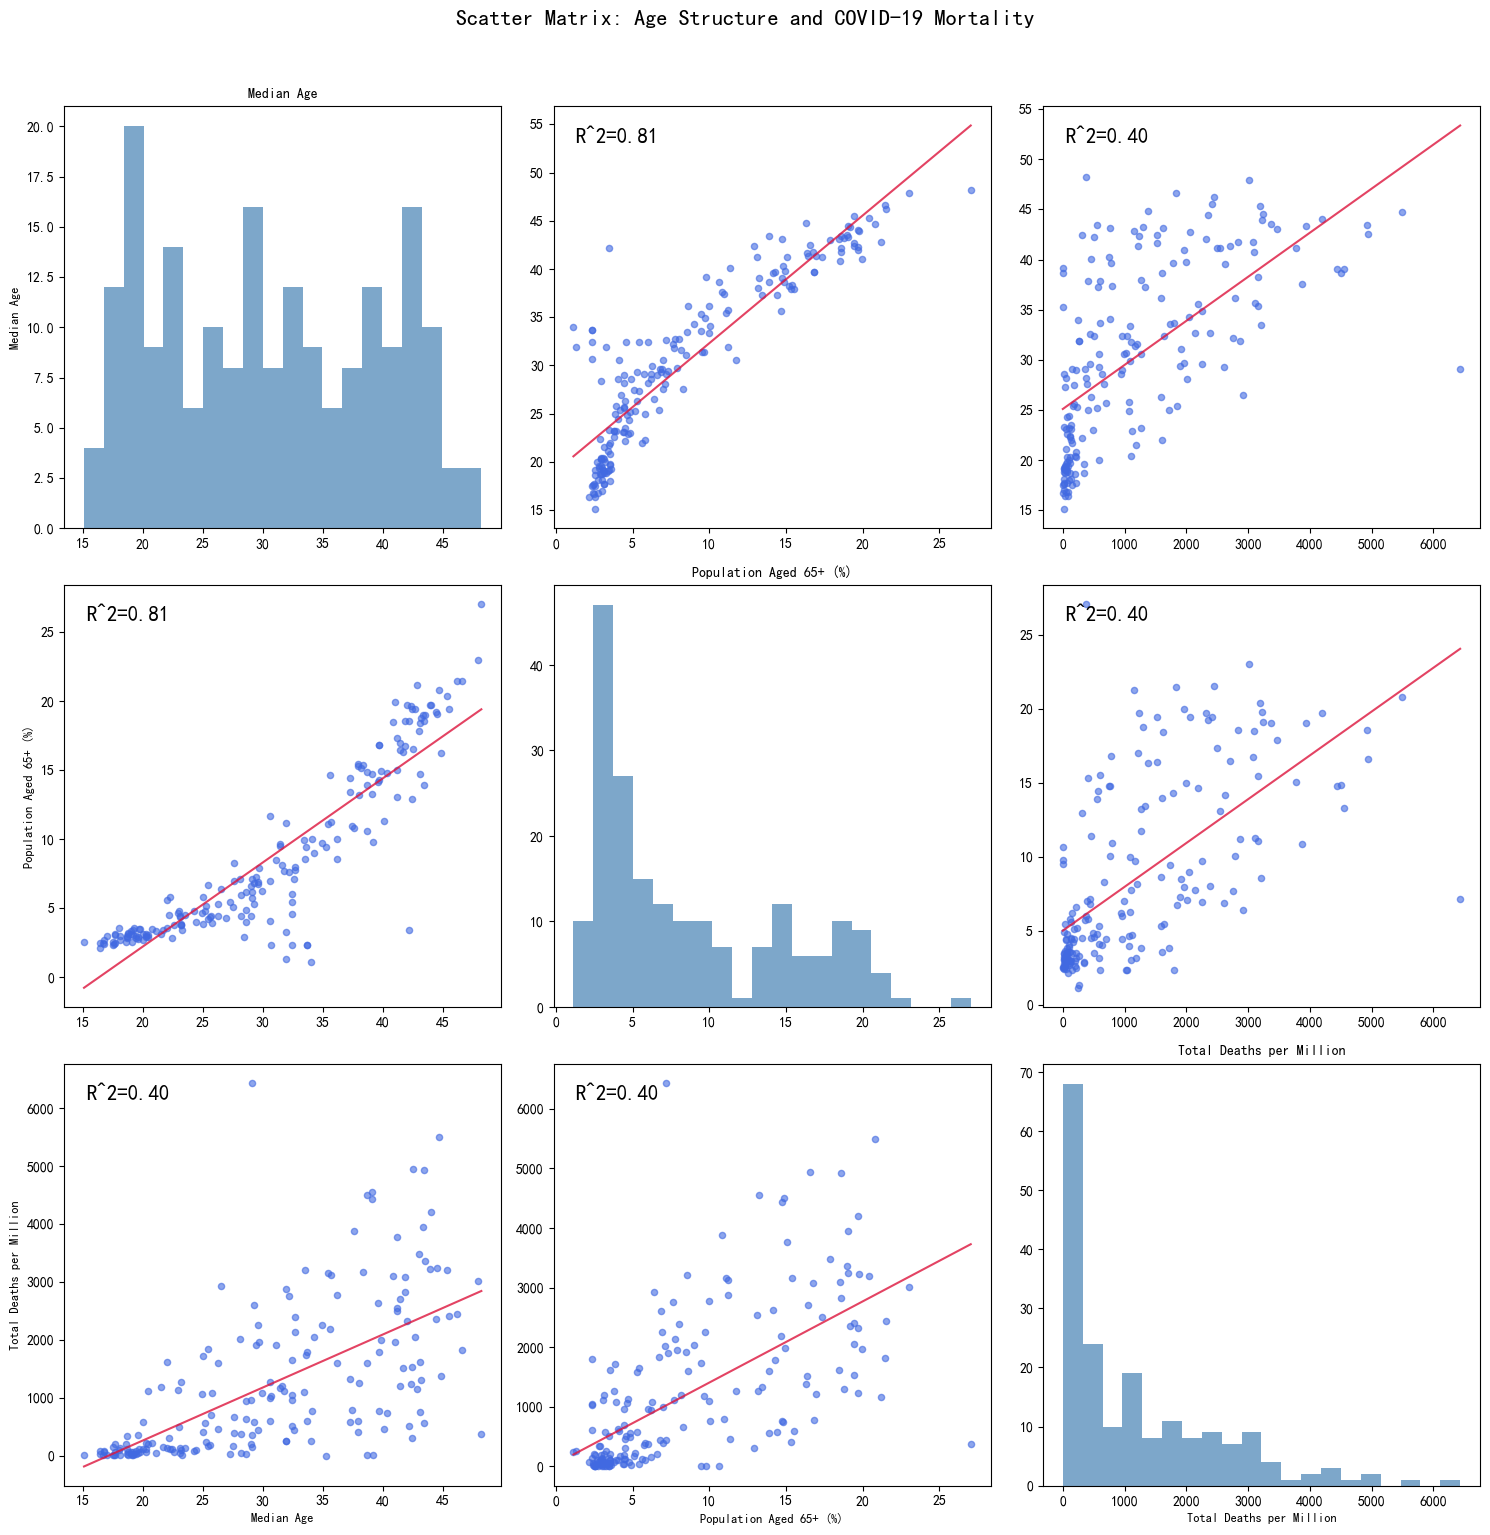

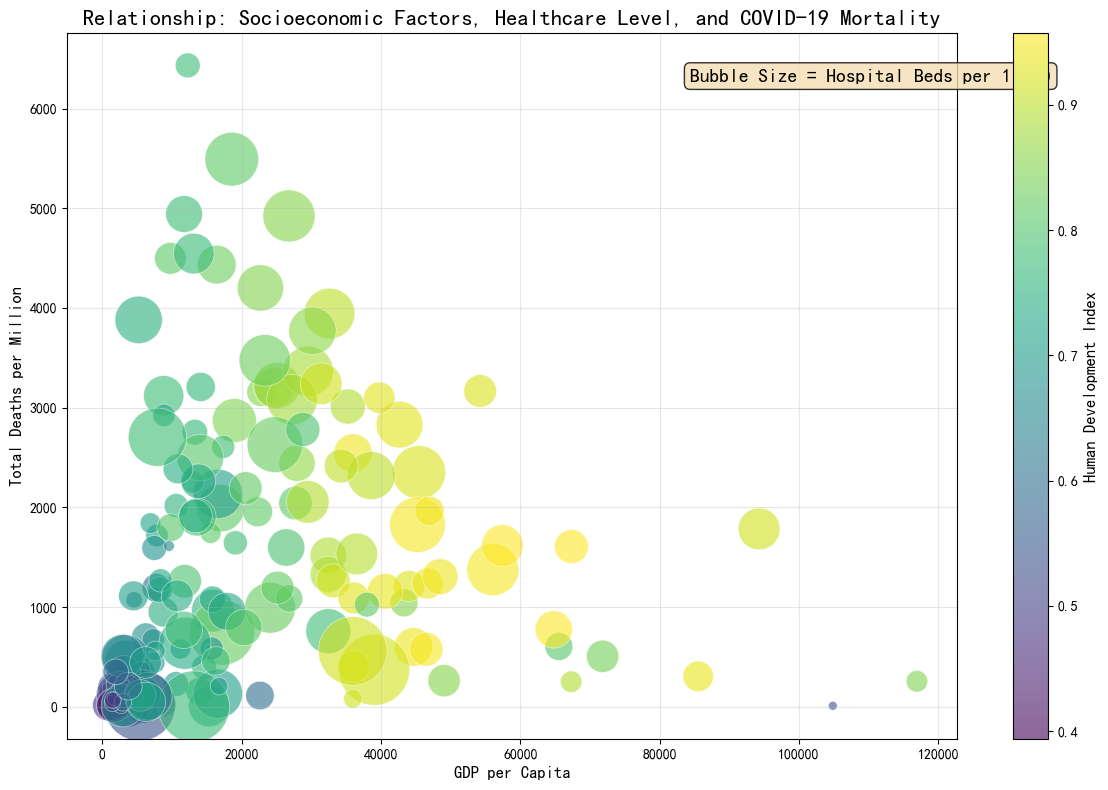

In [21]:
# 1. Create socioeconomic and epidemic data
def create_socio_economic_data(df):    
    socio_economic = df.groupby('location').agg({
        'median_age': 'mean',
        'total_deaths_per_million': 'max',
        'aged_65_older': 'mean',
        'gdp_per_capita': 'mean',
        'hospital_beds_per_thousand': 'mean',
        'human_development_index': 'mean'
    }).reset_index()
    
    return socio_economic

# 2. Plot scatter matrix
def plot_scatter_matrix(socio_economic):
    # Select variables for analysis
    variables = ['median_age', 'aged_65_older', 'total_deaths_per_million']
    missing_vars = [var for var in variables if var not in socio_economic.columns]
    if missing_vars:
        print(f"Missing variables: {missing_vars}")
        return
    
    # Create scatter matrix plot
    fig, axes = plt.subplots(len(variables), len(variables), figsize=(15, 15))
    
    var_names = {
        'median_age': 'Median Age',
        'aged_65_older': 'Population Aged 65+ (%)',
        'total_deaths_per_million': 'Total Deaths per Million'
    }
    
    for i, var_y in enumerate(variables):
        for j, var_x in enumerate(variables):
            ax = axes[i, j]
            
            if i == j:
                # Diagonal: histogram
                ax.hist(socio_economic[var_x], bins=20, alpha=0.7, color='steelblue')
                ax.set_title(var_names.get(var_x, var_x), fontsize=10)
            else:
                # Off-diagonal: scatter plot
                ax.scatter(socio_economic[var_x], socio_economic[var_y], 
                          alpha=0.6, s=20, color='royalblue')
                
                # Regression line
                if len(socio_economic) > 2:
                    x = socio_economic[var_x].values
                    y = socio_economic[var_y].values
                    mask = ~np.isnan(x) & ~np.isnan(y)
                    if np.sum(mask) > 2:
                        from scipy import stats
                        slope, intercept, r_value, _, _ = stats.linregress(x[mask], y[mask])
                        x_line = np.array([x[mask].min(), x[mask].max()])
                        y_line = slope * x_line + intercept
                        ax.plot(x_line, y_line, color='crimson', linewidth=1.5, alpha=0.8)
                        
                        # R² value
                        ax.text(0.05, 0.95, f'R^2={r_value**2:.2f}', 
                               transform=ax.transAxes, fontsize=15,
                               verticalalignment='top')
            
            # Axis labels
            if i == len(variables)-1: 
                ax.set_xlabel(var_names.get(var_x, var_x), fontsize=9)
            if j == 0: 
                ax.set_ylabel(var_names.get(var_y, var_y), fontsize=9)
    
    plt.suptitle('Scatter Matrix: Age Structure and COVID-19 Mortality', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation matrix
    corr_matrix = socio_economic[variables].corr()    
    return corr_matrix

# 3. Bubble chart: Country size and epidemic severity
def plot_bubble_chart(socio_economic):
    """Create bubble chart: Country population and epidemic severity"""
    
    plt.figure(figsize=(12, 8))
    
    # Create bubble chart
    scatter = plt.scatter(
        socio_economic['gdp_per_capita'],
        socio_economic['total_deaths_per_million'],
        s=socio_economic['hospital_beds_per_thousand']*200,  # Bubble size (based on hospital beds per thousand)
        c=socio_economic['human_development_index'],      # Bubble color (based on Human Development Index)
        alpha=0.6,
        cmap='viridis',
        edgecolors='white',
        linewidth=0.5
    )
    
    cbar = plt.colorbar(scatter)
    cbar.set_label('Human Development Index', fontsize=12)
    plt.title('Relationship: Socioeconomic Factors, Healthcare Level, and COVID-19 Mortality', fontsize=16, fontweight='bold')
    plt.xlabel('GDP per Capita', fontsize=12)
    plt.ylabel('Total Deaths per Million', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Correlation annotation
    plt.text(0.70, 0.95, 'Bubble Size = Hospital Beds per 1,000', 
        transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.tight_layout()
    plt.show()

# Execute the functions
socio_economic = create_socio_economic_data(df)
plot_scatter_matrix(socio_economic)
plot_bubble_chart(socio_economic)

Number of countries analyzed: 188
Population density range: 2.0 - 20546.8 people/km²
New cases per million range: 0.0 - 698.9


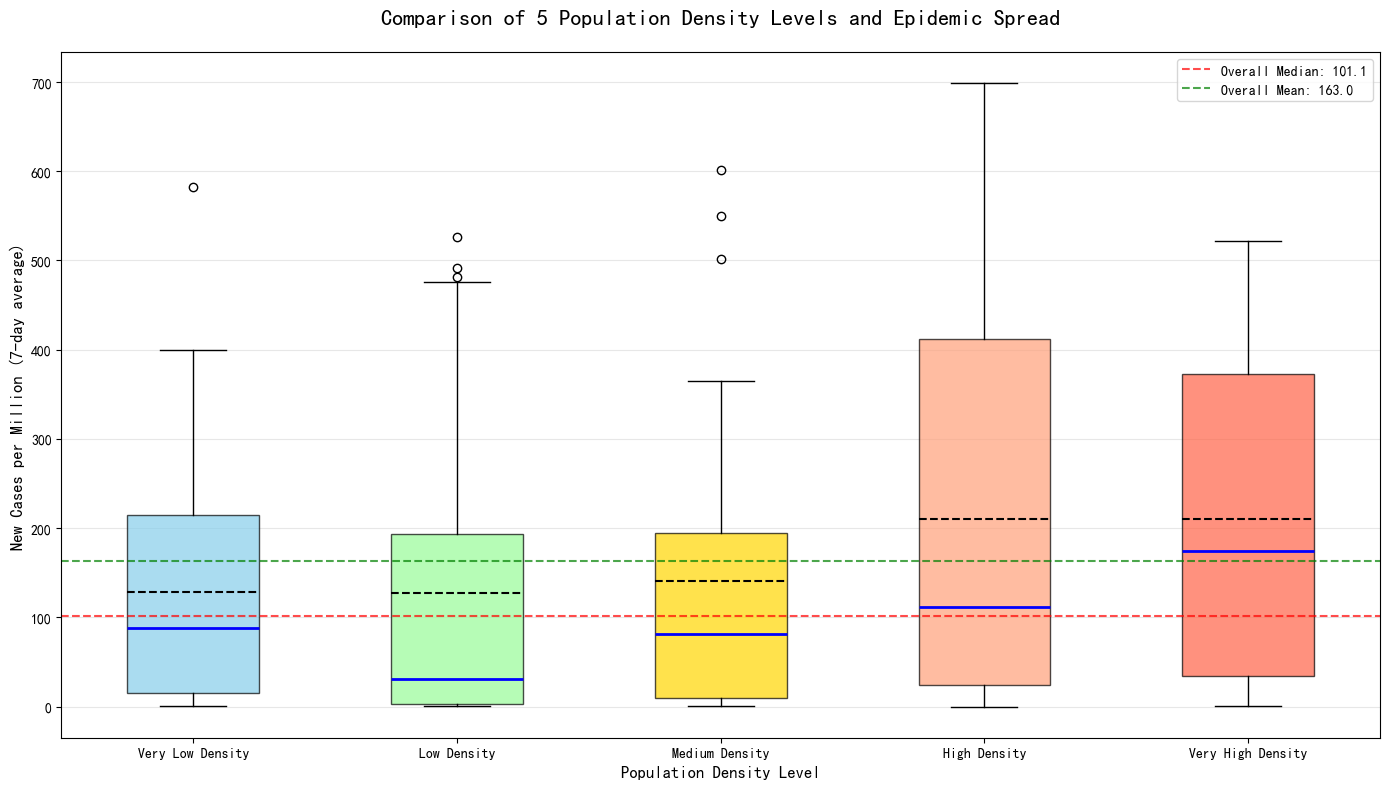

=== Epidemic Spread Statistics (5 Levels) ===

[Very Low Density] Number of countries: 38
          Average cases: 128.2
          Median: 87.9
          Standard deviation: 136.0

[Low Density] Number of countries: 37
          Average cases: 127.0
          Median: 31.1
          Standard deviation: 167.8

[Medium Density] Number of countries: 38
          Average cases: 140.3
          Median: 81.6
          Standard deviation: 159.8

[High Density] Number of countries: 37
          Average cases: 209.8
          Median: 111.3
          Standard deviation: 220.4

[Very High Density] Number of countries: 38
          Average cases: 210.1
          Median: 174.7
          Standard deviation: 172.3


C:\Users\30760\AppData\Local\Temp\ipykernel_81744\270831249.py:109: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\30760\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


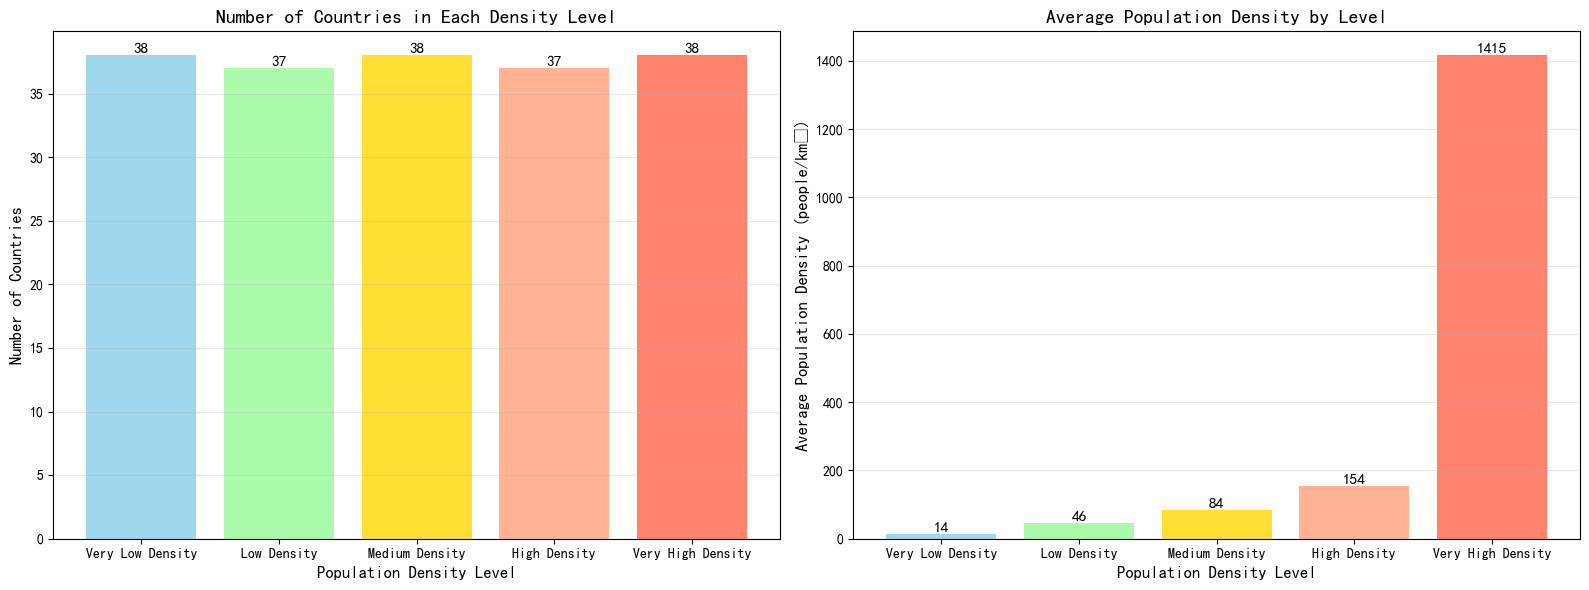

=== Detailed Population Density Stratification ===

Very Low Density Level:
  Average density: 14 people/km²
  High density examples: Chile, Angola, Somalia
  Low density examples: Mongolia, Namibia, Australia

Low Density Level:
  Average density: 46 people/km²
  High density examples: Guinea-Bissau, Bulgaria, Georgia
  Low density examples: Sweden, Brazil, Peru

Medium Density Level:
  Average density: 84 people/km²
  High density examples: Turkey, Albania, Sierra Leone
  Low density examples: Mexico, Ecuador, Bosnia and Herzegovina

High Density Level:
  Average density: 154 people/km²
  High density examples: Dominican Republic, Switzerland, Uganda
  Low density examples: Ethiopia, Austria, Hungary

Very High Density Level:
  Average density: 1415 people/km²
  High density examples: Macao, Singapore, Hong Kong
  Low density examples: Qatar, Luxembourg, Kuwait


In [25]:
# 1. Analyze relationship between population density and epidemic spread
def prepare_density_data(df):
    required_cols = ['location', 'population_density', 'new_cases_smoothed_per_million']
    # Check if columns exist
    for col in required_cols:
        if col not in df.columns:
            print(f"Warning: Data missing {col} column")
            return None
    
    # Calculate average by country
    density_data = df.groupby('location').agg({
        'population_density': 'mean',
        'new_cases_smoothed_per_million': 'mean'
    }).reset_index()
    
    # Remove missing values
    density_data = density_data.dropna()
    
    print(f"Number of countries analyzed: {len(density_data)}")
    print(f"Population density range: {density_data['population_density'].min():.1f} - {density_data['population_density'].max():.1f} people/km²")
    print(f"New cases per million range: {density_data['new_cases_smoothed_per_million'].min():.1f} - {density_data['new_cases_smoothed_per_million'].max():.1f}")
    
    return density_data

# 2. Box plot: Population density vs. epidemic spread
def plot_density_boxplot_5levels(density_data):
    # Population density stratification
    density_data['Density Level'] = pd.qcut(
        density_data['population_density'], 
        q=5, 
        labels=['Very Low Density', 'Low Density', 'Medium Density', 'High Density', 'Very High Density']
    )
    
    # Create box plot
    plt.figure(figsize=(14, 8))
    box_data = []
    labels = []
    
    for level in density_data['Density Level'].cat.categories:
        subset = density_data[density_data['Density Level'] == level]
        box_data.append(subset['new_cases_smoothed_per_million'].values)
        labels.append(level)
    
    # Draw box plot
    bp = plt.boxplot(box_data, tick_labels=labels, patch_artist=True, showmeans=True, meanline=True)
    colors = ['#87CEEB', '#98FB98', '#FFD700', '#FFA07A', '#FF6347']  # Light blue to dark red
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.setp(bp['means'], color='black', linewidth=1.5)
    plt.setp(bp['medians'], color='blue', linewidth=2)
    plt.title('Comparison of 5 Population Density Levels and Epidemic Spread', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Population Density Level', fontsize=12)
    plt.ylabel('New Cases per Million (7-day average)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add overall median line
    median_value = density_data['new_cases_smoothed_per_million'].median()
    plt.axhline(y=median_value, color='red', linestyle='--', alpha=0.7, 
                label=f'Overall Median: {median_value:.1f}')
    
    # Add overall mean line
    mean_value = density_data['new_cases_smoothed_per_million'].mean()
    plt.axhline(y=mean_value, color='green', linestyle='--', alpha=0.7, 
                label=f'Overall Mean: {mean_value:.1f}')
    
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    print("=== Epidemic Spread Statistics (5 Levels) ===")
    for i, (level, data) in enumerate(zip(labels, box_data)):
        print(f"\n[{level}]"+f" Number of countries: {len(data)}")
        print(f"          Average cases: {np.mean(data):.1f}")
        print(f"          Median: {np.median(data):.1f}")
        print(f"          Standard deviation: {np.std(data):.1f}")
    return density_data

# 3. Density distribution by level
def plot_density_distribution_by_level(density_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Left: Number of countries in each density level
    level_counts = density_data['Density Level'].value_counts().sort_index()
    colors = ['#87CEEB', '#98FB98', '#FFD700', '#FFA07A', '#FF6347']
    ax1.bar(level_counts.index, level_counts.values, color=colors, alpha=0.8)
    ax1.set_title('Number of Countries in Each Density Level', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Population Density Level', fontsize=12)
    ax1.set_ylabel('Number of Countries', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Value labels
    for i, v in enumerate(level_counts.values):
        ax1.text(i, v, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Right: Average density for each level
    level_means = density_data.groupby('Density Level', observed=False)['population_density'].mean()
    ax2.bar(level_means.index, level_means.values, color=colors, alpha=0.8)
    ax2.set_title('Average Population Density by Level', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Population Density Level', fontsize=12)
    ax2.set_ylabel('Average Population Density (people/km²)', fontsize=12)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Value labels
    for i, v in enumerate(level_means.values):
        ax2.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Output detailed stratification information
    print("=== Detailed Population Density Stratification ===")
    for level in density_data['Density Level'].cat.categories:
        subset = density_data[density_data['Density Level'] == level]
        if len(subset) > 0:
            print(f"\n{level} Level:")
            print(f"  Average density: {subset['population_density'].mean():.0f} people/km²")
            
            # Show representative countries
            top_density_countries = subset.nlargest(3, 'population_density')['location'].tolist()
            bottom_density_countries = subset.nsmallest(3, 'population_density')['location'].tolist()
            print(f"  High density examples: {', '.join(top_density_countries)}")
            print(f"  Low density examples: {', '.join(bottom_density_countries)}")


density_data = prepare_density_data(df)
density_data = plot_density_boxplot_5levels(density_data)
plot_density_distribution_by_level(density_data)

Original number of countries: 188

=== Case Fatality Rate Distribution Statistics ===
Minimum: 0.0004
Maximum: 1.0000
Mean: 0.0268
Median: 0.0167

Found outliers with case fatality rate > 0.5: 1
Outlier countries:
  North Korea: 1.0000

Number of countries after removing outliers: 187


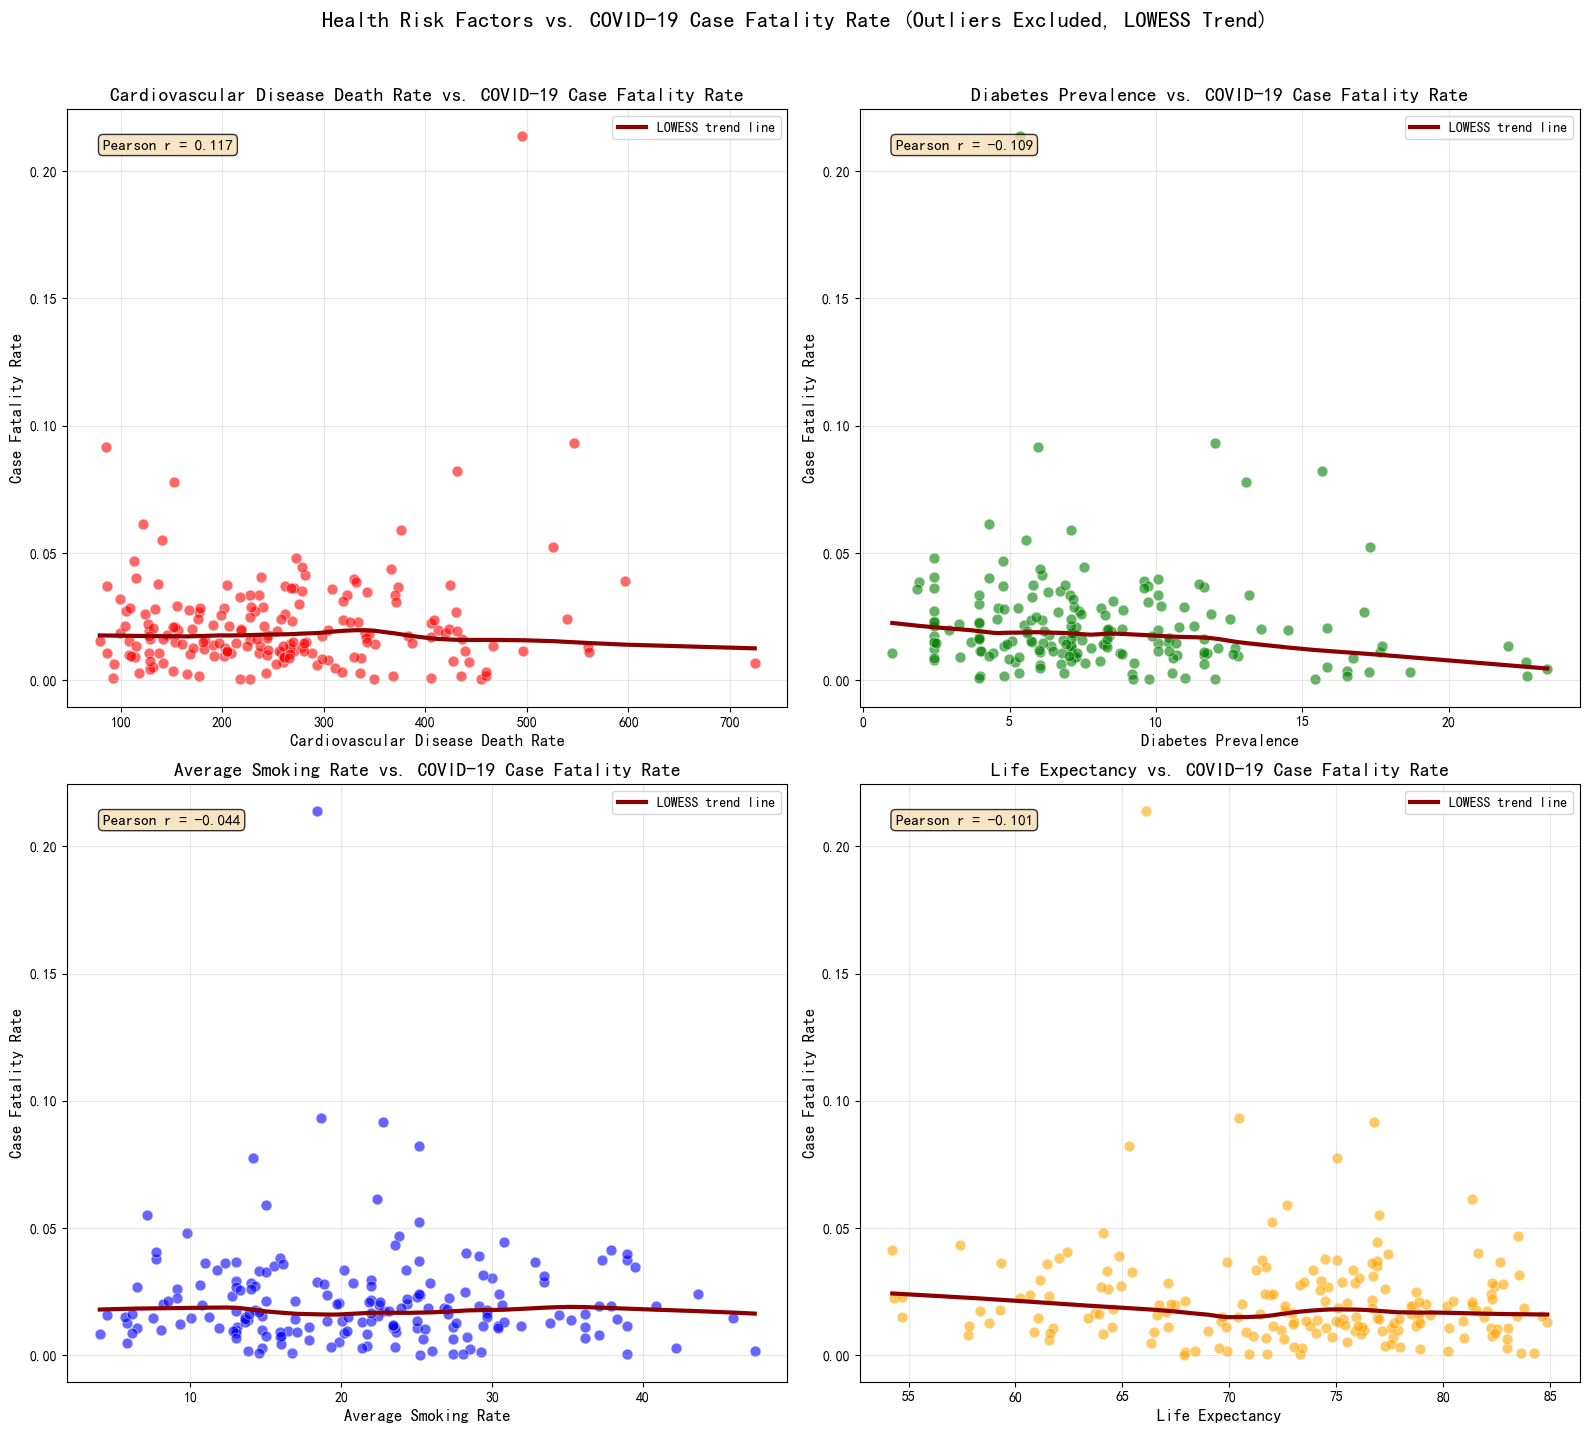


=== Summary of Correlations with Case Fatality Rate ===
Cardiovascular Disease Death Rate: Positive correlation, r = 0.117, p = 0.1106
Diabetes Prevalence: Negative correlation, r = -0.109, p = 0.1372
Average Smoking Rate: Negative correlation, r = -0.044, p = 0.5539
Life Expectancy: Negative correlation, r = -0.101, p = 0.1702


C:\Users\30760\AppData\Local\Temp\ipykernel_81744\1263376448.py:202: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\30760\AppData\Local\Temp\ipykernel_81744\1263376448.py:202: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\30760\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\30760\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


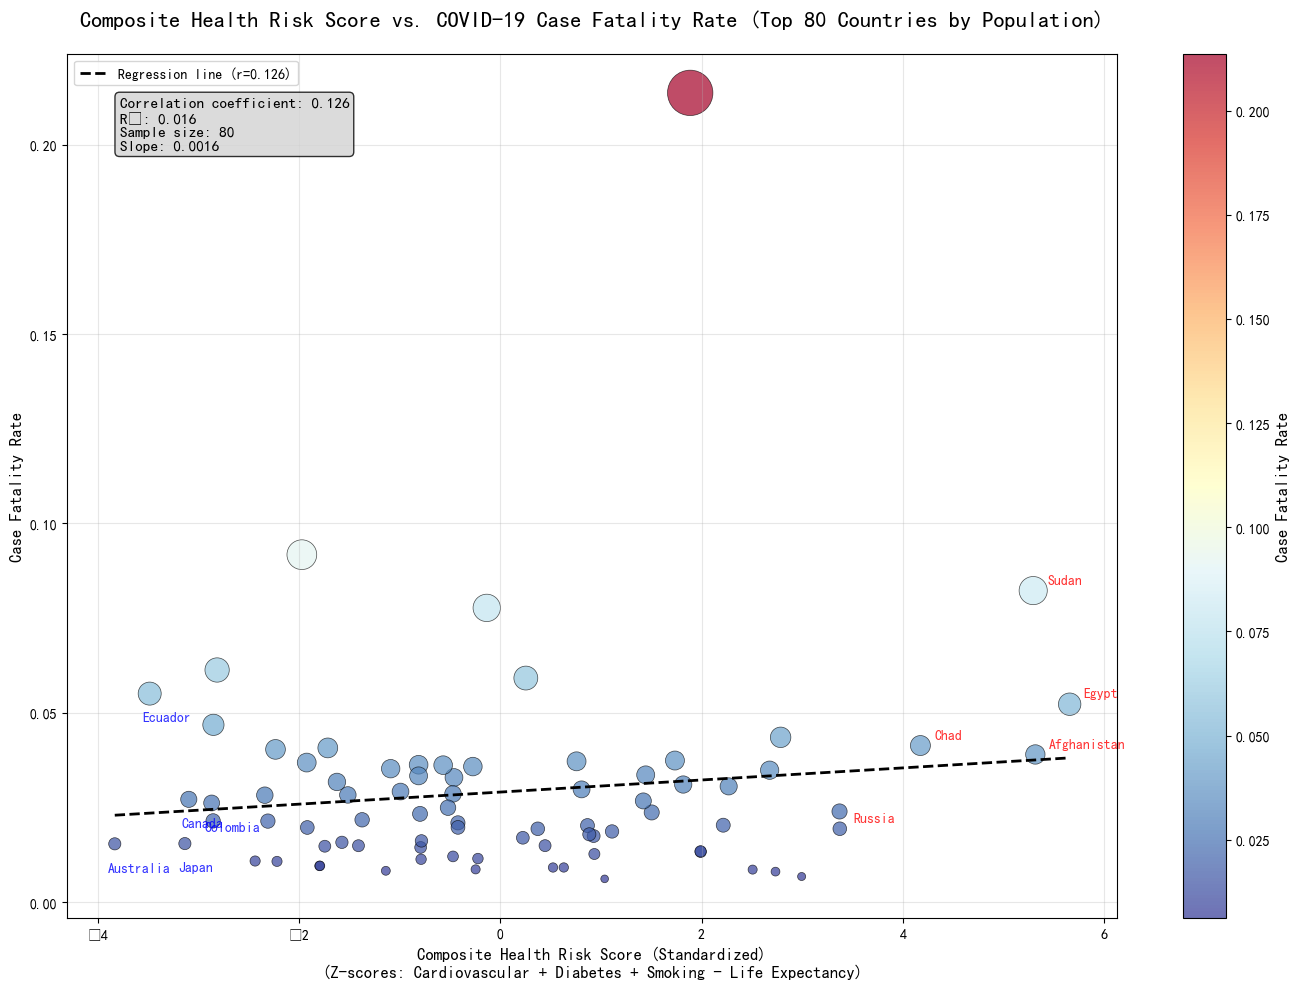


=== Composite Risk Score Analysis ===
Correlation between Composite Risk Score and Case Fatality Rate: 0.126 (R²=0.016)
Regression slope: 0.0016 (Mortality increases by 0.0016 per unit increase in risk score)

High-risk countries (highest composite risk score):
  Egypt: Risk Score=5.66, Mortality=0.0523
  Afghanistan: Risk Score=5.32, Mortality=0.0390
  Sudan: Risk Score=5.30, Mortality=0.0823
  Chad: Risk Score=4.17, Mortality=0.0414
  Russia: Risk Score=3.37, Mortality=0.0194

Low-risk countries (lowest composite risk score):
  Australia: Risk Score=-3.83, Mortality=0.0154
  Ecuador: Risk Score=-3.48, Mortality=0.0551
  Japan: Risk Score=-3.13, Mortality=0.0155
  Canada: Risk Score=-3.09, Mortality=0.0272
  Colombia: Risk Score=-2.87, Mortality=0.0262


In [30]:
# 1. Analyze data and exclude outliers
def prepare_health_data_without_outliers(df, mortality_threshold=0.5):    
    required_cols = [
        'location',
        'cardiovasc_death_rate',    # Cardiovascular disease death rate
        'diabetes_prevalence',      # Diabetes prevalence
        'female_smokers',           # Female smoking rate
        'male_smokers',             # Male smoking rate
        'life_expectancy',          # Life expectancy
        'case_fatality_rate',       # Case fatality rate
        'population'                # Population
    ]
    
    # Calculate average by country
    health_data = df.groupby('location').agg({
        col: 'mean' for col in required_cols if col != 'location'
    }).reset_index()
    
    # Remove missing values
    health_data = health_data.dropna()
    
    # Combine male and female smoking rates into average smoking rate
    if 'female_smokers' in health_data.columns and 'male_smokers' in health_data.columns:
        health_data['average_smokers'] = health_data[['female_smokers', 'male_smokers']].mean(axis=1)
    
    print(f"Original number of countries: {len(health_data)}")
    
    # Check case fatality rate distribution and exclude outliers
    print("\n=== Case Fatality Rate Distribution Statistics ===")
    print(f"Minimum: {health_data['case_fatality_rate'].min():.4f}")
    print(f"Maximum: {health_data['case_fatality_rate'].max():.4f}")
    print(f"Mean: {health_data['case_fatality_rate'].mean():.4f}")
    print(f"Median: {health_data['case_fatality_rate'].median():.4f}")
    
    # Identify outliers (case fatality rate > threshold)
    outliers = health_data[health_data['case_fatality_rate'] > mortality_threshold]
    print(f"\nFound outliers with case fatality rate > {mortality_threshold}: {len(outliers)}")
    if len(outliers) > 0:
        print("Outlier countries:")
        for _, row in outliers.iterrows():
            print(f"  {row['location']}: {row['case_fatality_rate']:.4f}")
    health_data_clean = health_data[health_data['case_fatality_rate'] <= mortality_threshold].copy()
    print(f"\nNumber of countries after removing outliers: {len(health_data_clean)}")
    
    return health_data_clean

# 2. Locally Weighted Scatterplot Smoothing (LOWESS)
def plot_lowess_scatterplots_improved(health_data):
    # Risk factors list
    risk_factors = [
        ('cardiovasc_death_rate', 'Cardiovascular Disease Death Rate', 'Red'),
        ('diabetes_prevalence', 'Diabetes Prevalence', 'Green'),
        ('average_smokers', 'Average Smoking Rate', 'Blue'),
        ('life_expectancy', 'Life Expectancy', 'Orange')
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()
    correlations = []
    
    for idx, (factor, factor_name, color) in enumerate(risk_factors):
        if idx >= len(axes):
            break
            
        if factor not in health_data.columns:
            continue
            
        ax = axes[idx]
        
        x = health_data[factor]
        y = health_data['case_fatality_rate']
        
        scatter = ax.scatter(x, y, alpha=0.6, s=60, 
                            color=color, edgecolors='white', linewidth=0.5)
        
        from statsmodels.nonparametric.smoothers_lowess import lowess
            
        # Sort data for smooth curve plotting
        sorted_idx = np.argsort(x)
        x_sorted = x.iloc[sorted_idx].values
        y_sorted = y.iloc[sorted_idx].values
            
        # Calculate LOWESS smoothing (using 50% of data points for local regression)
        lowess_result = lowess(y_sorted, x_sorted, frac=0.5, it=3)
        lowess_x, lowess_y = lowess_result[:, 0], lowess_result[:, 1]
        ax.plot(lowess_x, lowess_y, color='darkred', linewidth=3, label='LOWESS trend line')
            
        # Calculate correlation coefficient
        corr, p_value = stats.pearsonr(x, y)
        correlations.append((factor_name, corr, p_value))
        
        ax.set_title(f'{factor_name} vs. COVID-19 Case Fatality Rate', fontsize=14, fontweight='bold')
        ax.set_xlabel(factor_name, fontsize=12)
        ax.set_ylabel('Case Fatality Rate', fontsize=12)
        ax.grid(True, alpha=0.3)            
        corr_text = f'Pearson r = {corr:.3f}'
        if p_value < 0.05:
            direction = "Positive" if corr > 0 else "Negative"
            corr_text += f'\n{direction} correlation'
            
        ax.text(0.05, 0.95, corr_text, transform=ax.transAxes,
                fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        ax.legend(loc='upper right')
    
    plt.suptitle('Health Risk Factors vs. COVID-19 Case Fatality Rate (Outliers Excluded, LOWESS Trend)', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Output correlation summary
    print("\n=== Summary of Correlations with Case Fatality Rate ===")
    for factor_name, corr, p_value in correlations:
        direction = "Positive" if corr > 0 else "Negative"
        print(f"{factor_name}: {direction} correlation, r = {corr:.3f}, p = {p_value:.4f}")

# 3. Filter top 100 countries by population
def filter_top_population_countries(health_data):
    if 'population' in health_data.columns:
        health_data_sorted = health_data.sort_values('population', ascending=False)
        top_countries = health_data_sorted.head(80).copy()
        
        return top_countries

# 4. Multivariate joint analysis bubble chart
def plot_multivariate_bubble_chart(health_data):
    plt.figure(figsize=(14, 10))
    
    # Standardize data
    health_data_scaled = health_data.copy()
    
    # Calculate z-score for each variable
    for var in ['cardiovasc_death_rate', 'diabetes_prevalence', 'average_smokers', 'life_expectancy']:
        mean_val = health_data_scaled[var].mean()
        std_val = health_data_scaled[var].std()
        if std_val > 0:
            health_data_scaled[f'{var}_z'] = (health_data_scaled[var] - mean_val) / std_val
        else:
            health_data_scaled[f'{var}_z'] = 0
    
    # Calculate composite risk score
    health_data_scaled['Composite Risk Score'] = (
        health_data_scaled['cardiovasc_death_rate_z'] + 
        health_data_scaled['diabetes_prevalence_z'] + 
        health_data_scaled['average_smokers_z'] -  
        health_data_scaled['life_expectancy_z']   
    )
    
    # Bubble chart
    scatter = plt.scatter(
        health_data_scaled['Composite Risk Score'],
        health_data_scaled['case_fatality_rate'],
        s=health_data_scaled['case_fatality_rate'] * 5000,  # Bubble size proportional to fatality rate
        c=health_data_scaled['case_fatality_rate'],         # Bubble color proportional to fatality rate
        alpha=0.7,
        cmap='RdYlBu_r',  # Red for high mortality, blue for low mortality
        edgecolors='black',
        linewidth=0.5
    )
    
    # Regression line
    x = health_data_scaled['Composite Risk Score']
    y = health_data_scaled['case_fatality_rate']
    
    slope, intercept, r_value, p_value, _ = stats.linregress(x, y)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    
    plt.plot(x_line, y_line, 'k--', linewidth=2, label=f'Regression line (r={r_value:.3f})')
    
    cbar = plt.colorbar(scatter)
    cbar.set_label('Case Fatality Rate', fontsize=12)

    plt.title('Composite Health Risk Score vs. COVID-19 Case Fatality Rate (Top 80 Countries by Population)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Composite Health Risk Score (Standardized)\n(Z-scores: Cardiovascular + Diabetes + Smoking - Life Expectancy)', fontsize=12)
    plt.ylabel('Case Fatality Rate', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper left')
    stats_text = f'Correlation coefficient: {r_value:.3f}\nR²: {r_value**2:.3f}\nSample size: {len(health_data)}\nSlope: {slope:.4f}'
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    # Mark some extreme countries
    top_risk = health_data_scaled.nlargest(5, 'Composite Risk Score')
    bottom_risk = health_data_scaled.nsmallest(5, 'Composite Risk Score')
    
    # High-risk countries
    for _, row in top_risk.iterrows():
        plt.annotate(row['location'], 
                    xy=(row['Composite Risk Score'], row['case_fatality_rate']),
                    xytext=(10, 5), textcoords='offset points',
                    fontsize=10, color='red', alpha=0.8)
    
    # Low-risk countries
    for _, row in bottom_risk.iterrows():
        plt.annotate(row['location'], 
                    xy=(row['Composite Risk Score'], row['case_fatality_rate']),
                    xytext=(-5, -20), textcoords='offset points',
                    fontsize=10, color='blue', alpha=0.8)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n=== Composite Risk Score Analysis ===")
    print(f"Correlation between Composite Risk Score and Case Fatality Rate: {r_value:.3f} (R²={r_value**2:.3f})")
    print(f"Regression slope: {slope:.4f} (Mortality increases by {slope:.4f} per unit increase in risk score)")
    print("\nHigh-risk countries (highest composite risk score):")
    for _, row in top_risk.iterrows():
        print(f"  {row['location']}: Risk Score={row['Composite Risk Score']:.2f}, Mortality={row['case_fatality_rate']:.4f}")
    
    print("\nLow-risk countries (lowest composite risk score):")
    for _, row in bottom_risk.iterrows():
        print(f"  {row['location']}: Risk Score={row['Composite Risk Score']:.2f}, Mortality={row['case_fatality_rate']:.4f}")


health_data = prepare_health_data_without_outliers(df, 0.5)
plot_lowess_scatterplots_improved(health_data)
health_data_100 = filter_top_population_countries(health_data)
plot_multivariate_bubble_chart(health_data_100)

Number of countries analyzed: 15
China's estimated GDP: 21,828,592,383,058
Median estimated GDP of top 15 countries: 2,674,639,599,694


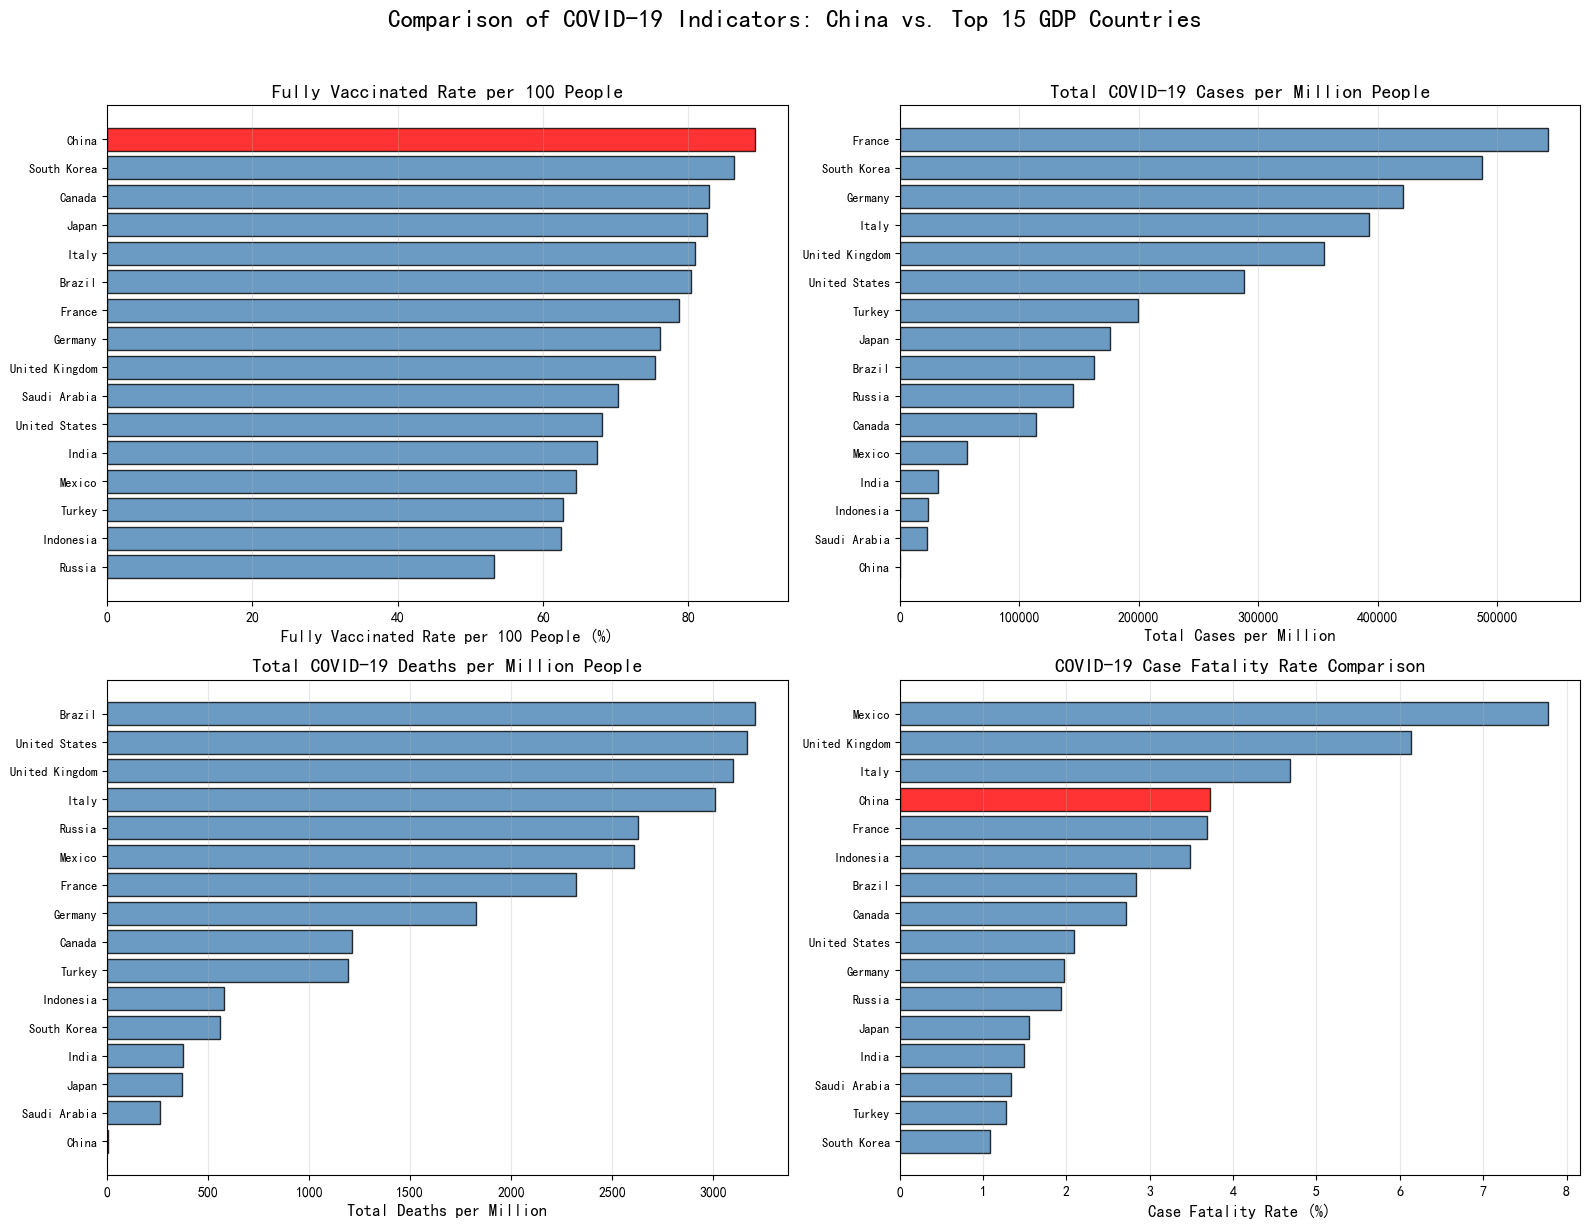


=== Summary of COVID-19 Performance Indicators ===
China:
  Vaccination rate: 89.2%
  Total cases per million: 713
  Total deaths per million: 4
  Case fatality rate: 3.72%

Average of other top 15 GDP countries:
  Average vaccination rate: 72.8%
  Average total cases per million: 227729
  Average total deaths per million: 1761
  Average case fatality rate: 2.94%

China's total cases per million is only 0.3% of other countries' average


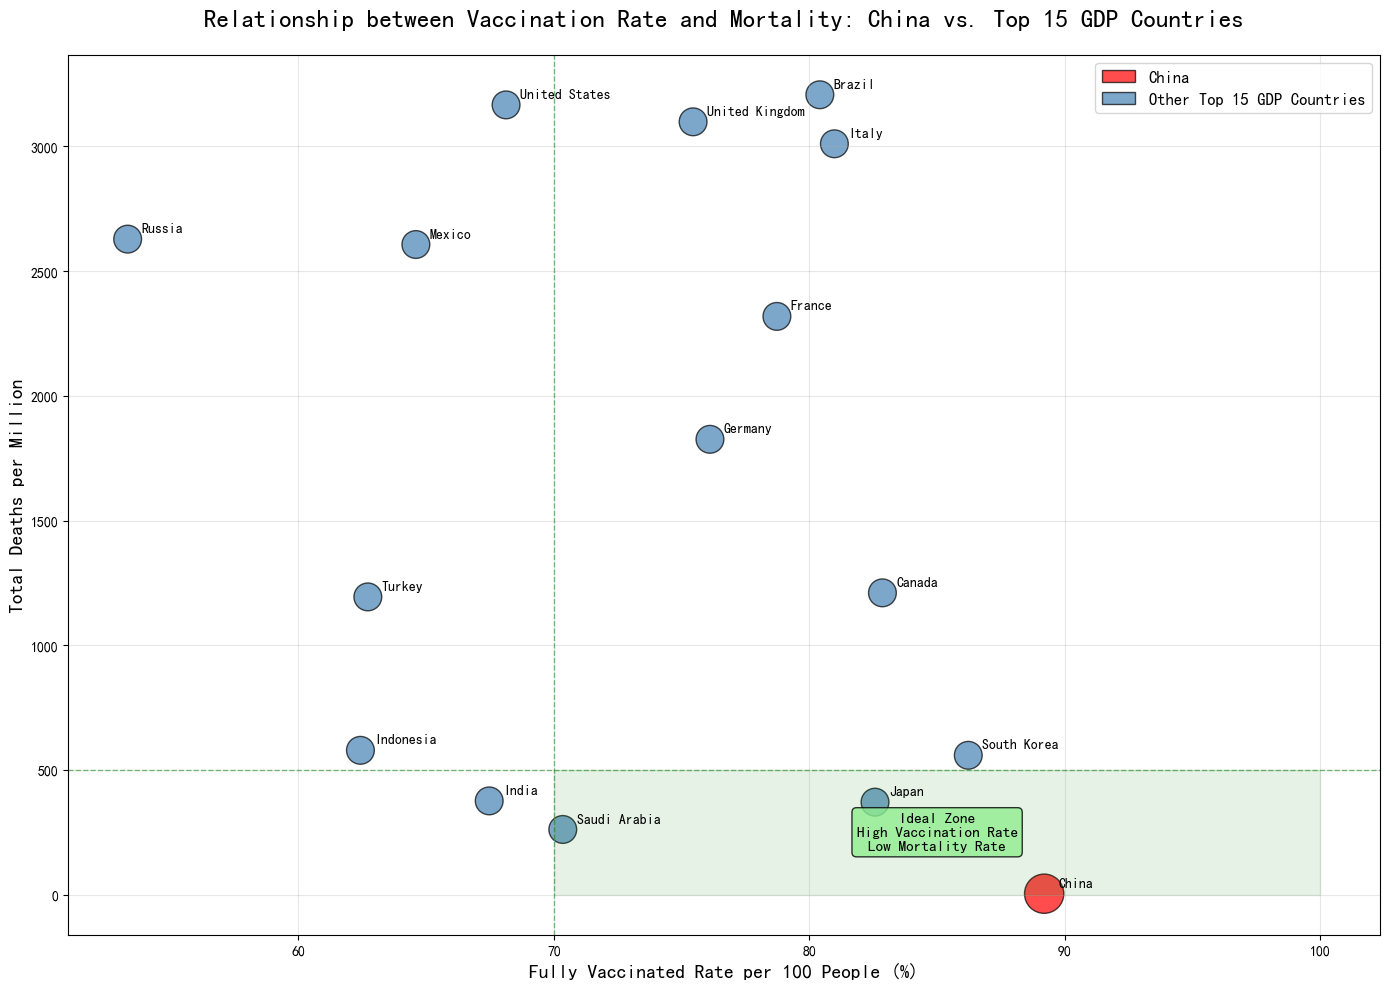


=== China's Position in the Vaccination-Mortality Coordinate System ===
China's vaccination rate: 89.2%
China's deaths per million: 4
China is in the ideal zone (high vaccination rate, low mortality)


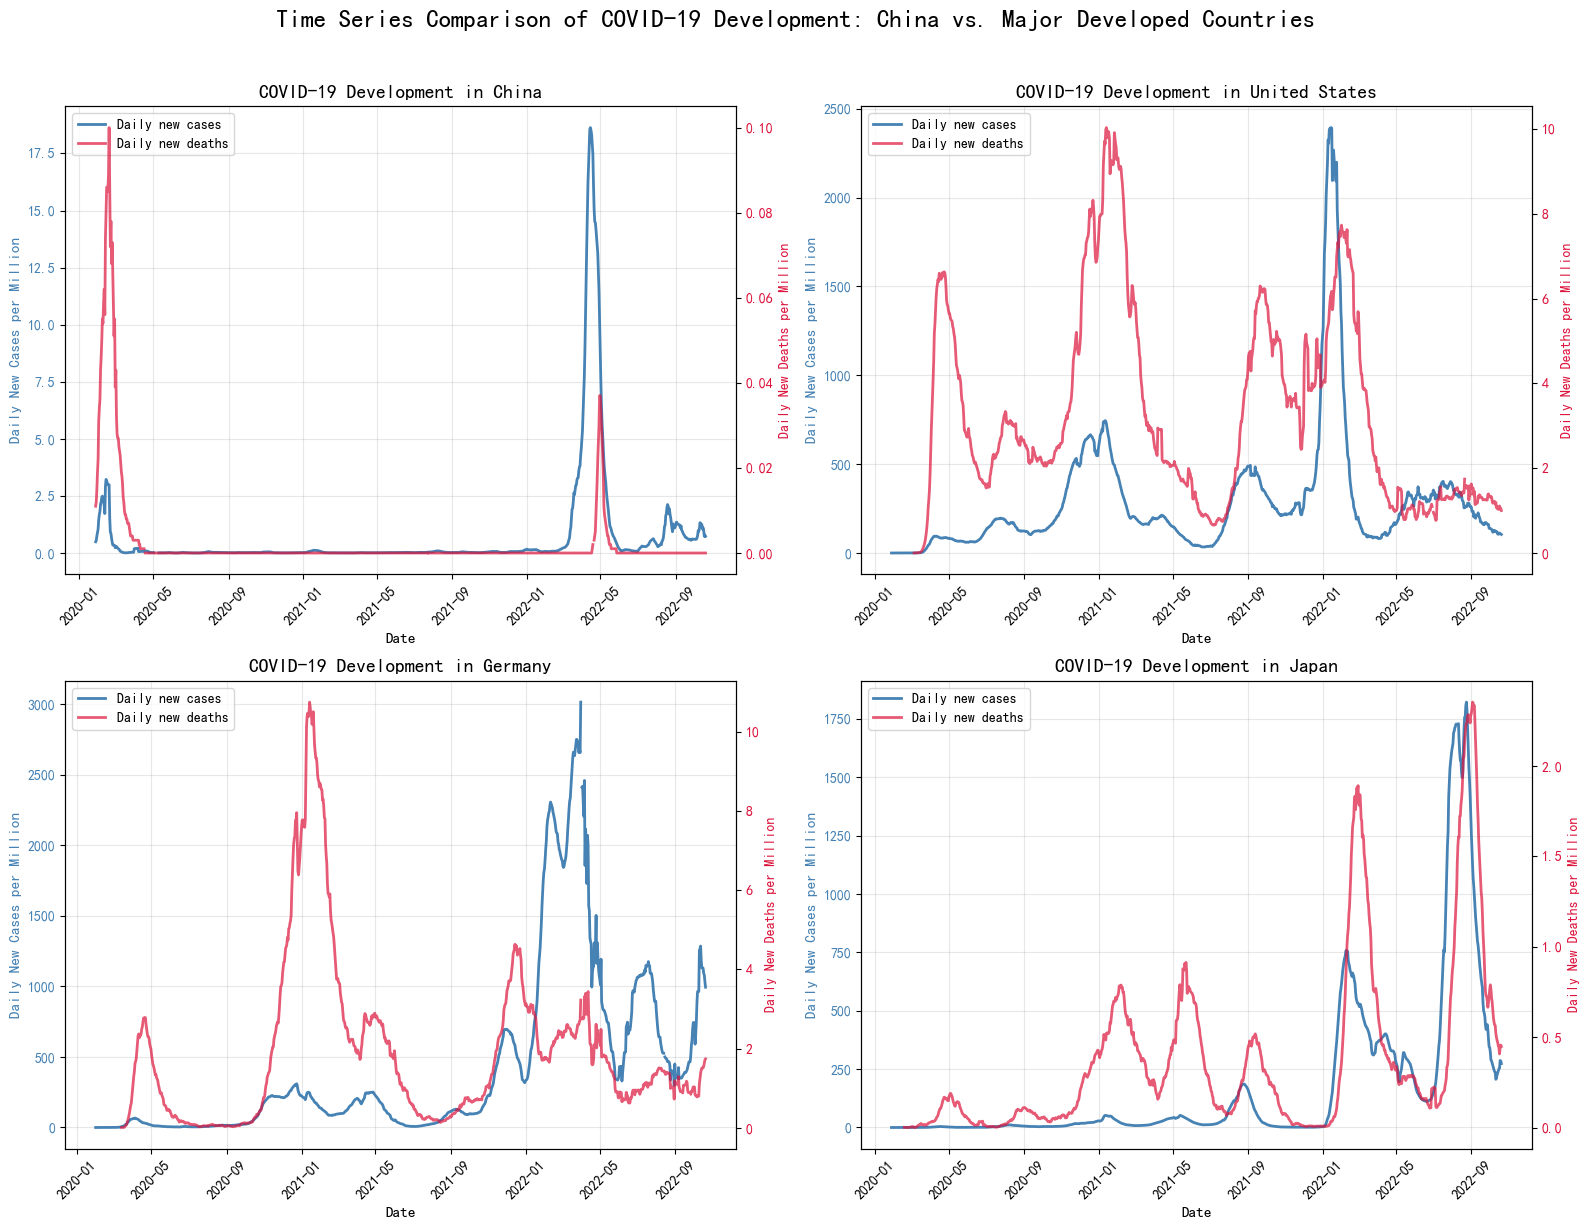

=== Comprehensive Analysis Conclusion of China's COVID-19 Response Achievements ===

1. Vaccination:
   ✓ China's vaccination rate (89.2%) is higher than the average of top 15 GDP countries (72.8%)

2. Case control:
   ✓ China's total cases per million is only 0.3% of other countries' average, showing significant case control effect

3. Mortality control:
   ✓ China's total deaths per million is only 0.2% of other countries' average, showing significant life protection effect


In [31]:
# 1. Get data for top GDP countries
def prepare_country_comparison_data(df, gdp_top_n=15):
    # Get latest data
    latest_data = df.copy()
    latest_data['date'] = pd.to_datetime(latest_data['date'])
    latest_dates = latest_data.groupby('location')['date'].max()
    latest_rows = []
    for country, max_date in latest_dates.items():
        country_latest = latest_data[(latest_data['location'] == country) & 
                                     (latest_data['date'] == max_date)].iloc[0]
        latest_rows.append(country_latest)
    latest_df = pd.DataFrame(latest_rows)
    
    # Calculate estimated total GDP (GDP per capita * population)
    latest_df['gdp_total_estimate'] = latest_df['gdp_per_capita'] * latest_df['population']
    
    # Sort by total GDP, get top 15 countries
    gdp_top_countries = latest_df[latest_df['location'] != 'China'].nlargest(gdp_top_n, 'gdp_total_estimate')
    china_data = latest_df[latest_df['location'] == 'China']
    comparison_countries = pd.concat([china_data, gdp_top_countries], ignore_index=True)
    
    print(f"Number of countries analyzed: {len(comparison_countries)-1}")
    print(f"China's estimated GDP: {china_data['gdp_total_estimate'].iloc[0]:,.0f}" if len(china_data) > 0 else "China data missing")
    print(f"Median estimated GDP of top 15 countries: {gdp_top_countries['gdp_total_estimate'].median():,.0f}")
    
    return comparison_countries, latest_df

# 2. Calculate COVID-19 performance metrics for each country
def calculate_covid_performance_metrics(df, comparison_countries):
    countries_list = comparison_countries['location'].tolist()
    
    # Initialize metrics dictionary
    performance_metrics = []
    
    for country in countries_list:
        country_data = df[df['location'] == country].copy()
        country_data['date'] = pd.to_datetime(country_data['date'])
        country_data = country_data.sort_values('date')
        
        # Calculate metrics
        # 1. Vaccination metrics
        # Fully vaccinated rate (latest value)
        if 'people_fully_vaccinated_per_hundred' in country_data.columns:
            vaccination_rate = country_data['people_fully_vaccinated_per_hundred'].max()
        else:
            vaccination_rate = np.nan
        
        # 2. Case growth metrics
        # Average daily new cases (per million)
        if 'new_cases_smoothed_per_million' in country_data.columns:
            avg_daily_cases = country_data['new_cases_smoothed_per_million'].mean()
        else:
            avg_daily_cases = np.nan
        
        # Total cases (per million)
        if 'total_cases_per_million' in country_data.columns:
            total_cases_per_million = country_data['total_cases_per_million'].max()
        else:
            total_cases_per_million = np.nan
        
        # 3. Death metrics
        # Total deaths (per million)
        if 'total_deaths_per_million' in country_data.columns:
            total_deaths_per_million = country_data['total_deaths_per_million'].max()
        else:
            total_deaths_per_million = np.nan
        
        # Case fatality rate
        if 'case_fatality_rate' in country_data.columns:
            case_fatality = country_data['case_fatality_rate'].mean()
        else:
            case_fatality = np.nan
        
        # Collect metrics
        metrics = {
            'country': country,
            'vaccination_rate': vaccination_rate,
            'avg_daily_cases_per_million': avg_daily_cases,
            'total_cases_per_million': total_cases_per_million,
            'total_deaths_per_million': total_deaths_per_million,
            'case_fatality_rate': case_fatality,
        }
        
        performance_metrics.append(metrics)
    
    performance_df = pd.DataFrame(performance_metrics)
    
    # Calculate rankings
    if 'performance_score' in performance_df.columns:
        performance_df = performance_df.sort_values('performance_score')
        performance_df['performance_rank'] = range(1, len(performance_df) + 1)
    
    return performance_df

# 3. Cases and deaths comparison chart (modified: using vaccination rate instead of comprehensive anti-epidemic score)
def plot_cases_deaths_comparison(performance_df):
    # Create 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Vaccination rate comparison (content of original first chart)
    ax1 = axes[0, 0]
    vaccination_data = performance_df.sort_values('vaccination_rate', ascending=True)
    vacc_colors = []
    for country in vaccination_data['country']:
        if country == 'China':
            vacc_colors.append('red')
        else:
            vacc_colors.append('steelblue')
    
    y_pos1 = np.arange(len(vaccination_data))
    bars1 = ax1.barh(y_pos1, vaccination_data['vaccination_rate'], color=vacc_colors, alpha=0.8, edgecolor='black')
    
    ax1.set_yticks(y_pos1)
    ax1.set_yticklabels(vaccination_data['country'], fontsize=9)
    ax1.set_title('Fully Vaccinated Rate per 100 People', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Fully Vaccinated Rate per 100 People (%)', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='x')
    
    # 2. Total cases per million comparison
    ax2 = axes[0, 1]
    cases_data = performance_df.sort_values('total_cases_per_million', ascending=True)
    case_colors = []
    for country in cases_data['country']:
        if country == 'China':
            case_colors.append('red')
        else:
            case_colors.append('steelblue')
    
    y_pos2 = np.arange(len(cases_data))
    bars2 = ax2.barh(y_pos2, cases_data['total_cases_per_million'], color=case_colors, alpha=0.8, edgecolor='black')
    ax2.set_yticks(y_pos2)
    ax2.set_yticklabels(cases_data['country'], fontsize=9)
    ax2.set_title('Total COVID-19 Cases per Million People', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Total Cases per Million', fontsize=12)
    ax2.grid(True, alpha=0.3, axis='x')
    
    
    # 3. Total deaths per million comparison
    ax3 = axes[1, 0]
    deaths_data = performance_df.sort_values('total_deaths_per_million', ascending=True)
    death_colors = []
    for country in deaths_data['country']:
        if country == 'China':
            death_colors.append('red')
        else:
            death_colors.append('steelblue')
    
    y_pos3 = np.arange(len(deaths_data))
    bars3 = ax3.barh(y_pos3, deaths_data['total_deaths_per_million'], color=death_colors, alpha=0.8, edgecolor='black')
    ax3.set_yticks(y_pos3)
    ax3.set_yticklabels(deaths_data['country'], fontsize=9)
    ax3.set_title('Total COVID-19 Deaths per Million People', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Total Deaths per Million', fontsize=12)
    ax3.grid(True, alpha=0.3, axis='x')
    
    
    # 4. Case fatality rate comparison (original third chart, now moved to fourth)
    ax4 = axes[1, 1]
    fatality_data = performance_df.sort_values('case_fatality_rate', ascending=True)
    fatality_colors = []
    for country in fatality_data['country']:
        if country == 'China':
            fatality_colors.append('red')
        else:
            fatality_colors.append('steelblue')
    y_pos4 = np.arange(len(fatality_data))
    bars4 = ax4.barh(y_pos4, fatality_data['case_fatality_rate']*100, color=fatality_colors, alpha=0.8, edgecolor='black')
    ax4.set_yticks(y_pos4)
    ax4.set_yticklabels(fatality_data['country'], fontsize=9)
    ax4.set_title('COVID-19 Case Fatality Rate Comparison', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Case Fatality Rate (%)', fontsize=12)
    ax4.grid(True, alpha=0.3, axis='x')
    plt.suptitle('Comparison of COVID-19 Indicators: China vs. Top 15 GDP Countries', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Output statistical summary
    print("\n=== Summary of COVID-19 Performance Indicators ===")
    china_stats = performance_df[performance_df['country'] == 'China'].iloc[0]
    other_stats = performance_df[performance_df['country'] != 'China']
    
    print(f"China:")
    print(f"  Vaccination rate: {china_stats['vaccination_rate']:.1f}%" if not np.isnan(china_stats['vaccination_rate']) else "  Vaccination rate: N/A")
    print(f"  Total cases per million: {china_stats['total_cases_per_million']:.0f}")
    print(f"  Total deaths per million: {china_stats['total_deaths_per_million']:.0f}")
    print(f"  Case fatality rate: {china_stats['case_fatality_rate']*100:.2f}%" if not np.isnan(china_stats['case_fatality_rate']) else "  Case fatality rate: N/A")
    
    print(f"\nAverage of other top 15 GDP countries:")
    print(f"  Average vaccination rate: {other_stats['vaccination_rate'].mean():.1f}%" if 'vaccination_rate' in other_stats.columns and not other_stats['vaccination_rate'].isna().all() else "  Average vaccination rate: N/A")
    print(f"  Average total cases per million: {other_stats['total_cases_per_million'].mean():.0f}")
    print(f"  Average total deaths per million: {other_stats['total_deaths_per_million'].mean():.0f}")
    print(f"  Average case fatality rate: {other_stats['case_fatality_rate'].mean()*100:.2f}%" if 'case_fatality_rate' in other_stats.columns and not other_stats['case_fatality_rate'].isna().all() else "  Average case fatality rate: N/A")
    
    # Calculate China's performance relative to other countries
    if not np.isnan(china_stats['total_cases_per_million']) and not other_stats['total_cases_per_million'].isna().all():
        cases_ratio = other_stats['total_cases_per_million'].mean() / china_stats['total_cases_per_million'] if china_stats['total_cases_per_million'] > 0 else float('inf')
        print(f"\nChina's total cases per million is only {1/cases_ratio:.1%} of other countries' average")

# 4. Bubble chart: Vaccination vs. mortality, bubble size representing GDP
def plot_bubble_vaccination_vs_deaths(performance_df, latest_df):
    # Merge GDP data
    bubble_data = performance_df.copy()
    gdp_data = latest_df[['location', 'gdp_total_estimate']].drop_duplicates()
    bubble_data = bubble_data.merge(gdp_data, left_on='country', right_on='location', how='left')
    bubble_data = bubble_data.dropna(subset=['vaccination_rate', 'total_deaths_per_million', 'gdp_total_estimate'])
    # Create bubble chart
    plt.figure(figsize=(14, 10))
    
    # Create colors and sizes for each country
    colors = []
    sizes = []
    
    for country in bubble_data['country']:
        if country == 'China':
            colors.append('red')
            sizes.append(800) 
        else:
            colors.append('steelblue')
            sizes.append(400)  
    
    # Draw scatter plot
    scatter = plt.scatter(
        bubble_data['vaccination_rate'],
        bubble_data['total_deaths_per_million'],
        s=sizes,
        c=colors,
        alpha=0.7,
        edgecolors='black',
        linewidth=1
    )
    
    # Add country labels
    for i, row in bubble_data.iterrows():
        plt.annotate(row['country'],
        xy=(row['vaccination_rate'], row['total_deaths_per_million']),
        xytext=(10, 5), textcoords='offset points',
        fontsize=10, fontweight='bold' if row['country'] == 'China' else 'normal')
    
    plt.title('Relationship between Vaccination Rate and Mortality: China vs. Top 15 GDP Countries', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Fully Vaccinated Rate per 100 People (%)', fontsize=14)
    plt.ylabel('Total Deaths per Million', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.axvline(x=70, color='green', linestyle='--', alpha=0.5, linewidth=1)
    plt.axhline(y=500, color='green', linestyle='--', alpha=0.5, linewidth=1)
    plt.fill_between([70, 100], 0, 500, color='green', alpha=0.1)
    plt.text(85, 250, 'Ideal Zone\nHigh Vaccination Rate\nLow Mortality Rate', 
             fontsize=11, ha='center', va='center',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', alpha=0.7, edgecolor='black', label='China'),
        Patch(facecolor='steelblue', alpha=0.7, edgecolor='black', label='Other Top 15 GDP Countries')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Analyze China's position in the bubble chart
    china_data = bubble_data[bubble_data['country'] == 'China']
    if len(china_data) > 0:
        china_row = china_data.iloc[0]
        print(f"\n=== China's Position in the Vaccination-Mortality Coordinate System ===")
        print(f"China's vaccination rate: {china_row['vaccination_rate']:.1f}%")
        print(f"China's deaths per million: {china_row['total_deaths_per_million']:.0f}")
        
        # Determine if in ideal zone
        if china_row['vaccination_rate'] >= 70 and china_row['total_deaths_per_million'] <= 500:
            print("China is in the ideal zone (high vaccination rate, low mortality)")
        else:
            print("China is not completely in the ideal zone")

# 5. Time series comparison chart (China vs. US vs. EU average)
def plot_time_series_comparison(df, comparison_countries):
    # Select several representative countries for time series comparison
    selected_countries = ['China', 'United States', 'Germany', 'Japan', 'United Kingdom']
    
    # Ensure these countries are in the data
    available_countries = [c for c in selected_countries if c in df['location'].unique()]
    
    # Create time series chart
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    for i, country in enumerate(available_countries):
        if i >= 4:  # Show at most 4 countries
            break
            
        country_data = df[df['location'] == country].copy()
        country_data['date'] = pd.to_datetime(country_data['date'])
        country_data = country_data.sort_values('date')
        
        # Determine subplot position
        row, col = i // 2, i % 2
        ax = axes[row, col]
        
        # Plot daily new cases (per million)
        if 'new_cases_smoothed_per_million' in country_data.columns:
            ax.plot(country_data['date'], country_data['new_cases_smoothed_per_million'], 
                   linewidth=2, color='steelblue', label='Daily new cases')
        
        # Plot daily new deaths (per million)
        if 'new_deaths_smoothed_per_million' in country_data.columns:
            ax_twin = ax.twinx()
            ax_twin.plot(country_data['date'], country_data['new_deaths_smoothed_per_million'], 
                        linewidth=2, color='crimson', alpha=0.7, label='Daily new deaths')
            ax_twin.set_ylabel('Daily New Deaths per Million', fontsize=10, color='crimson')
            ax_twin.tick_params(axis='y', labelcolor='crimson')
        
        ax.set_title(f'COVID-19 Development in {country}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Date', fontsize=11)
        ax.set_ylabel('Daily New Cases per Million', fontsize=11, color='steelblue')
        ax.tick_params(axis='y', labelcolor='steelblue')
        
        ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
        
        ax.grid(True, alpha=0.3)
        
        # Add legend
        lines1, labels1 = ax.get_legend_handles_labels()
        if 'ax_twin' in locals():
            lines2, labels2 = ax_twin.get_legend_handles_labels()
            ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        else:
            ax.legend(loc='upper left')
    
    plt.suptitle('Time Series Comparison of COVID-19 Development: China vs. Major Developed Countries', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


comparison_countries, latest_df = prepare_country_comparison_data(df, 15)
performance_df = calculate_covid_performance_metrics(df, comparison_countries)
plot_cases_deaths_comparison(performance_df)
plot_bubble_vaccination_vs_deaths(performance_df, latest_df)
plot_time_series_comparison(df, comparison_countries)
    
# Output comprehensive analysis conclusion
print("=== Comprehensive Analysis Conclusion of China's COVID-19 Response Achievements ===")
    
china_data = performance_df[performance_df['country'] == 'China']
other_data = performance_df[performance_df['country'] != 'China']
    
if len(china_data) > 0:
    china_row = china_data.iloc[0]
        
    print("\n1. Vaccination:")
    other_vaccination_avg = other_data['vaccination_rate'].mean()
    if china_row['vaccination_rate'] > other_vaccination_avg:
        print(f"   ✓ China's vaccination rate ({china_row['vaccination_rate']:.1f}%) is higher than the average of top 15 GDP countries ({other_vaccination_avg:.1f}%)")
    else:
        print(f"   ✗ China's vaccination rate ({china_row['vaccination_rate']:.1f}%) is lower than the average of top 15 GDP countries ({other_vaccination_avg:.1f}%)")
        
    print("\n2. Case control:")
    other_cases_avg = other_data['total_cases_per_million'].mean()
    cases_ratio = china_row['total_cases_per_million'] / other_cases_avg
    if cases_ratio < 0.1:
        print(f"   ✓ China's total cases per million is only {cases_ratio:.1%} of other countries' average, showing significant case control effect")
    else:
        print(f"   China's total cases per million is {cases_ratio:.1%} of other countries' average")
        
    print("\n3. Mortality control:")
    other_deaths_avg = other_data['total_deaths_per_million'].mean()
    deaths_ratio = china_row['total_deaths_per_million'] / other_deaths_avg
    if deaths_ratio < 0.1:
        print(f"   ✓ China's total deaths per million is only {deaths_ratio:.1%} of other countries' average, showing significant life protection effect")
    else:
        print(f"   China's total deaths per million is {deaths_ratio:.1%} of other countries' average")